In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load the dataset1
files = glob.glob('/content/drive/My Drive/Datasets/BigData/Dataset/CICIDS2017/MachineLearningCSV/MachineLearningCVE/*.csv')

# Read each file into a Pandas DataFrame and store them in a list
dfs = []
for file in files:
  df = pd.read_csv(file)

In [3]:
# Load the training dataset
data_path = ('/content/drive/My Drive/Datasets/BigData/Dataset/UNSW-NB15/UNSW_NB15_training-set.csv')
train_data = pd.read_csv(data_path)


In [4]:
# Load the testing dataset
data_path = ('/content/drive/My Drive/Datasets/BigData/Dataset/UNSW-NB15/UNSW_NB15_testing-set.csv')
test_data = pd.read_csv(data_path)


In [5]:
test_data.head()

id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           1           1                0      Normal   
1                 0           1           6                0      Normal   
2                 0           2           6                0      Normal   
3                 0           2           1                0      Normal   
4                 0           2          39                0      Normal   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 45 columns]

In [6]:
df.shape

(692703, 79)

In [7]:
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)


Training Data Shape: (82332, 45)
Testing Data Shape: (175341, 45)


In [8]:
print("\nTraining Data Info:")
print(train_data.info())



Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  s

In [9]:
print("\nTraining Data Head:")
print(train_data.head())

print("\nTesting Data Head:")
print(test_data.head())


Training Data Head:
   id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                 1               2             0   
1  125000.0003  ...                 1               2             0   
2  200000.0051  ...                 1               3             0   
3  166666.6608  ...                 1               3             0   
4  100000.0025  ...                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2      

In [10]:
print("Summary Statistics of Training Data:")
print(train_data.describe())



Summary Statistics of Training Data:
                 id           dur         spkts         dpkts        sbytes  \
count  82332.000000  82332.000000  82332.000000  82332.000000  8.233200e+04   
mean   41166.500000      1.006756     18.666472     17.545936  7.993908e+03   
std    23767.345519      4.710444    133.916353    115.574086  1.716423e+05   
min        1.000000      0.000000      1.000000      0.000000  2.400000e+01   
25%    20583.750000      0.000008      2.000000      0.000000  1.140000e+02   
50%    41166.500000      0.014138      6.000000      2.000000  5.340000e+02   
75%    61749.250000      0.719360     12.000000     10.000000  1.280000e+03   
max    82332.000000     59.999989  10646.000000  11018.000000  1.435577e+07   

             dbytes          rate          sttl          dttl         sload  \
count  8.233200e+04  8.233200e+04  82332.000000  82332.000000  8.233200e+04   
mean   1.323379e+04  8.241089e+04    180.967667     95.713003  6.454902e+07   
std    1.51471

In [11]:
train_data.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [12]:
print("Missing Values in Training Data:")
print(train_data.isnull().sum())

Missing Values in Training Data:
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
i

In [13]:
print("\nMissing Values in Testing Data:")
print(test_data.isnull().sum())


Missing Values in Testing Data:
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
i

In [14]:
print("Distribution of Target Variable in Training Data:")
print(train_data['attack_cat'].value_counts())

Distribution of Target Variable in Training Data:
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64


In [15]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataset to avoid modifying the original
train_data_encoded = train_data.copy()

# Initialize LabelEncoder
label_encoders = {}

# Encode categorical variables
for column in train_data_encoded.columns:
    if train_data_encoded[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        train_data_encoded[column] = label_encoders[column].fit_transform(train_data_encoded[column])


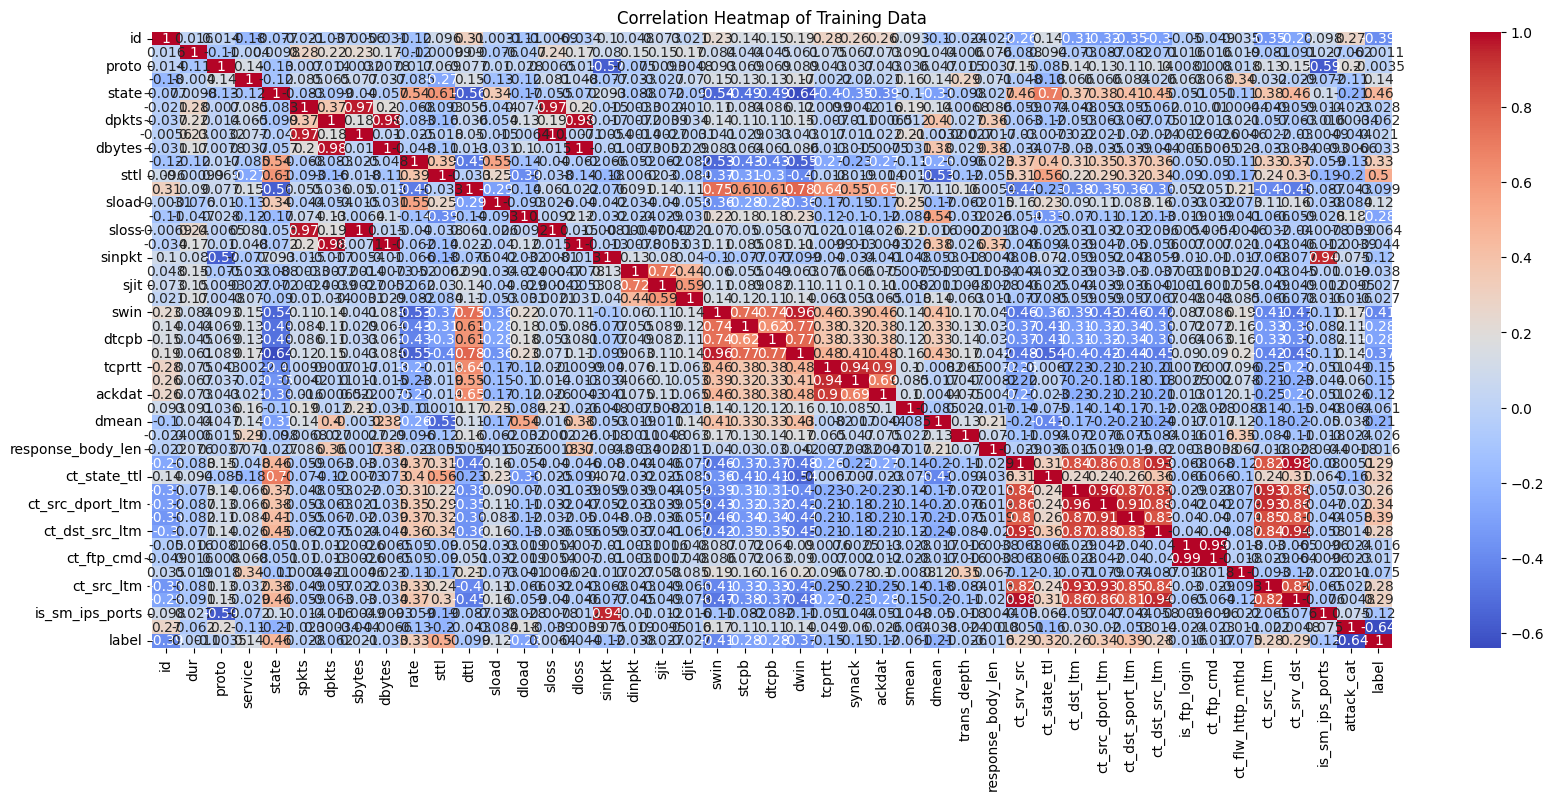

In [16]:
# Now, generate the correlation heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(train_data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Training Data')
plt.show()

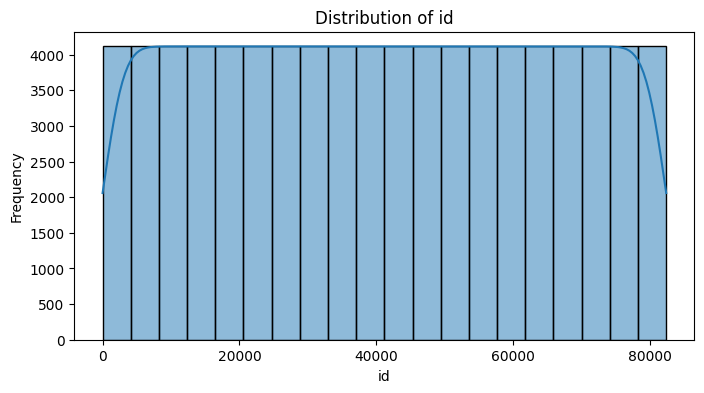

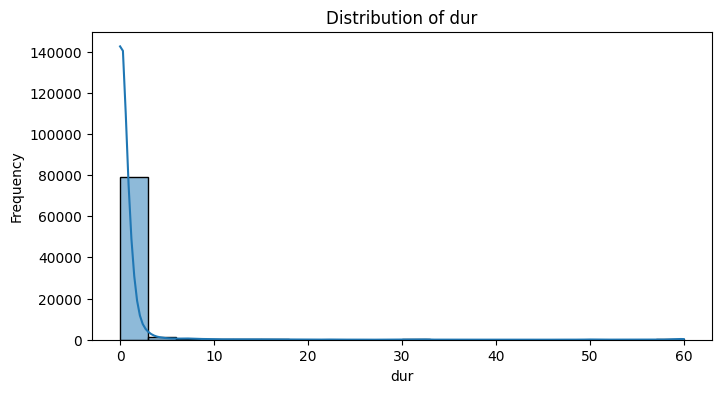

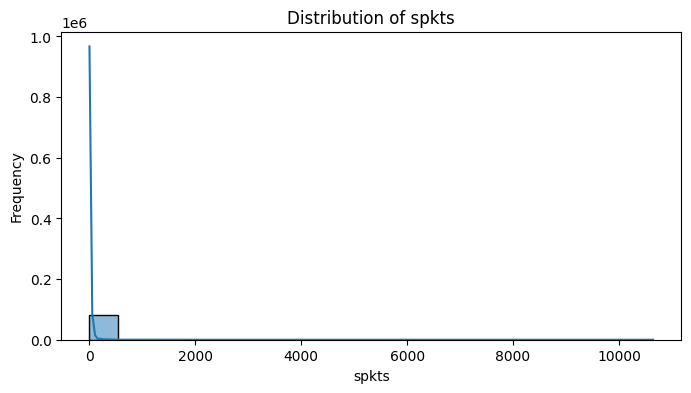

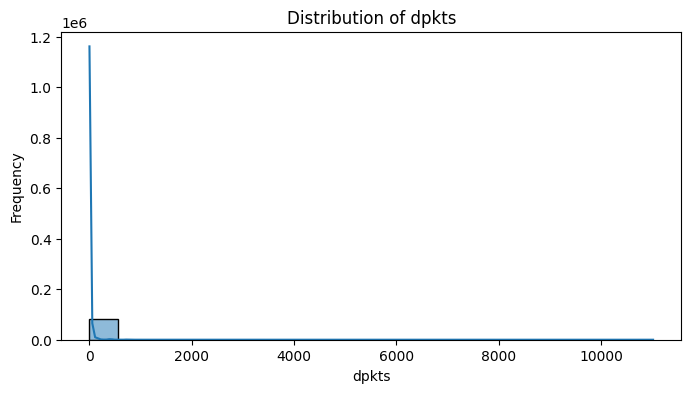

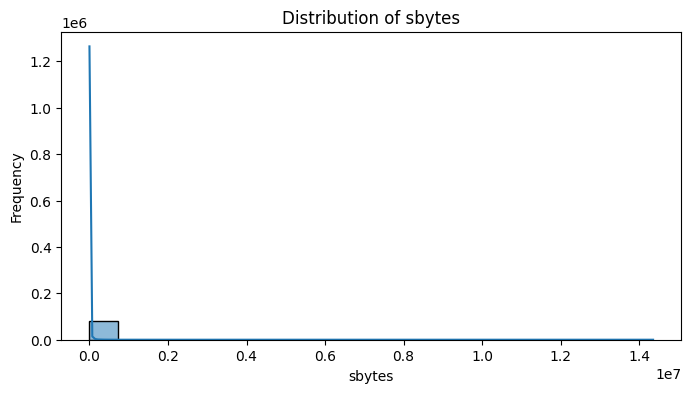

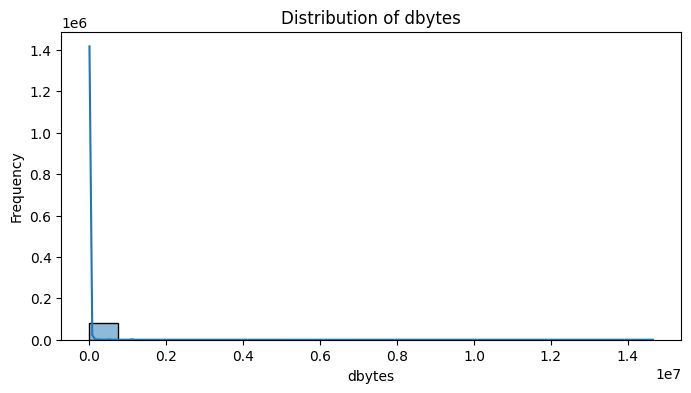

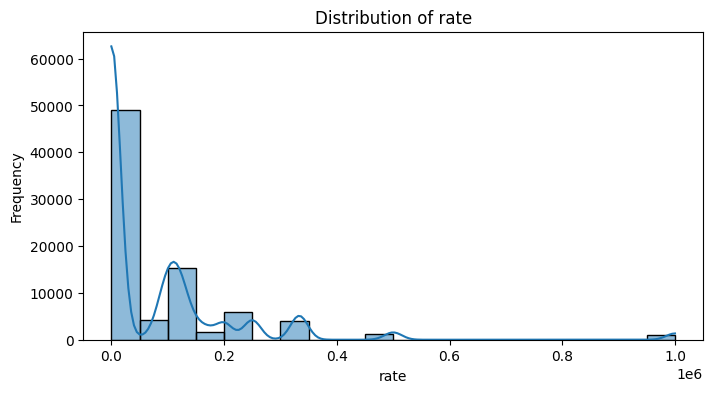

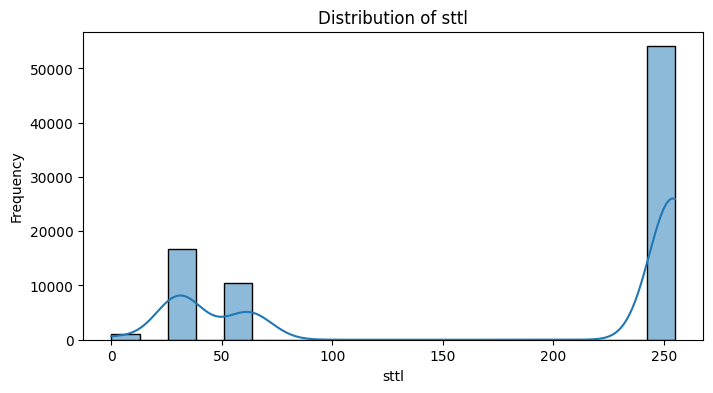

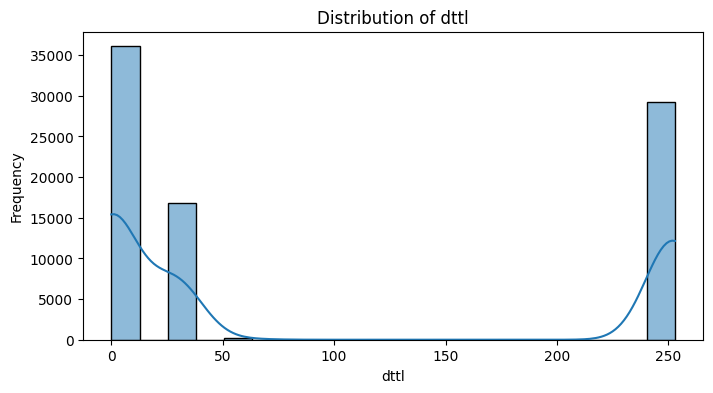

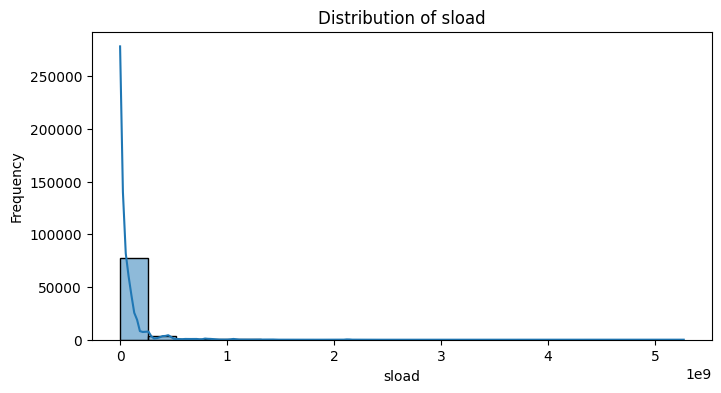

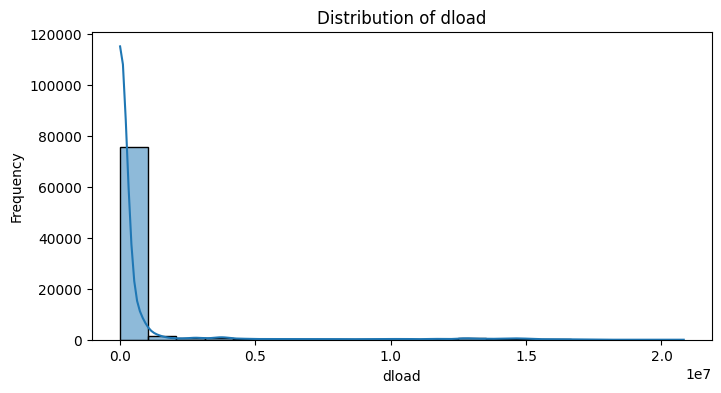

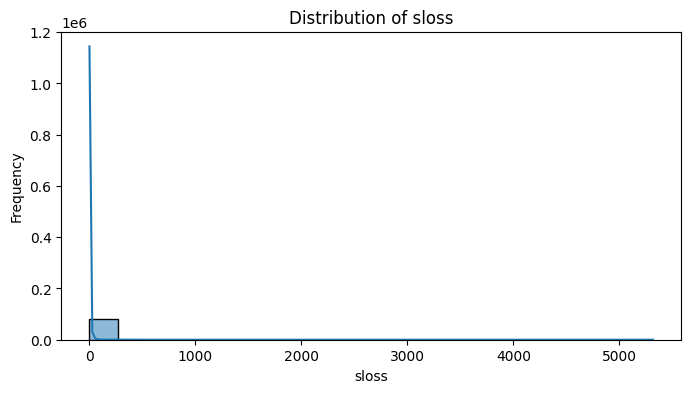

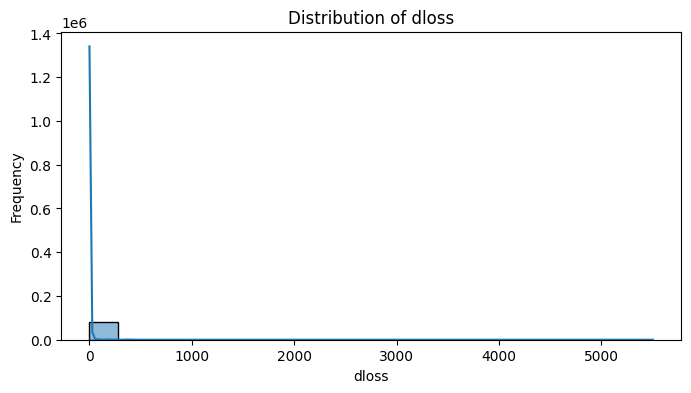

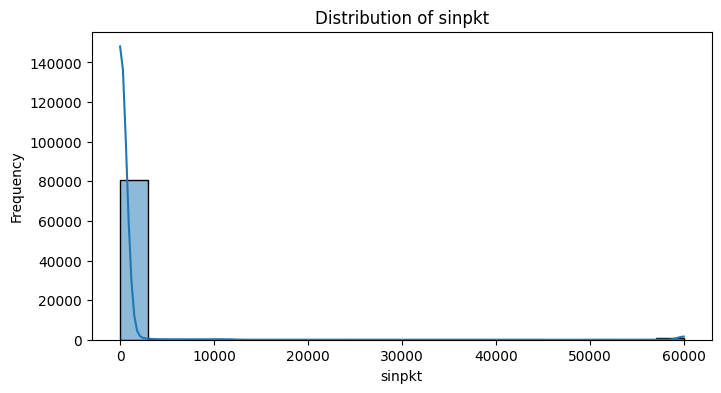

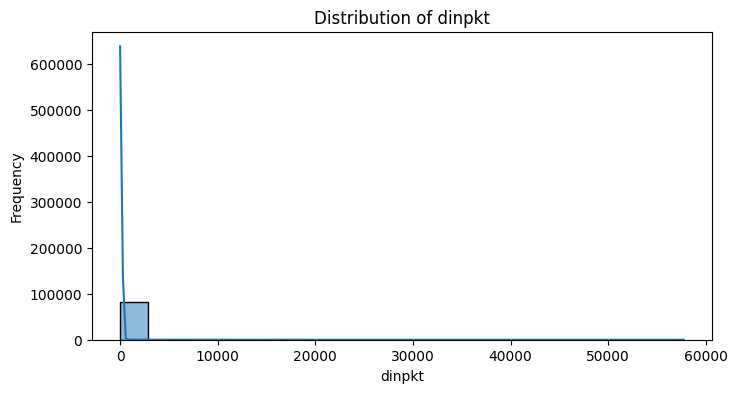

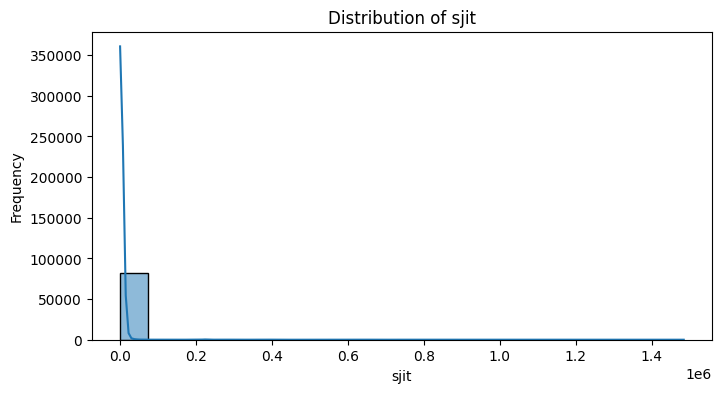

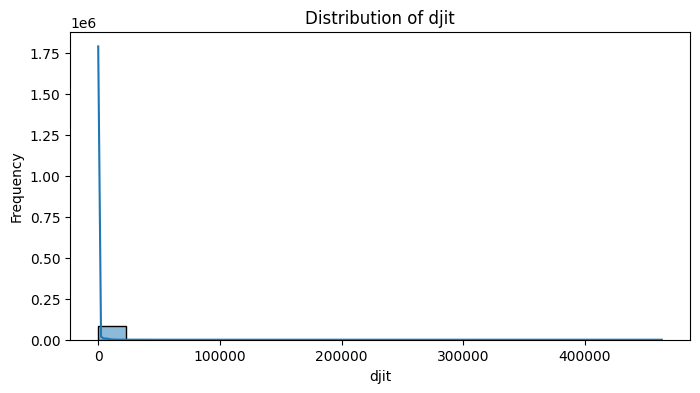

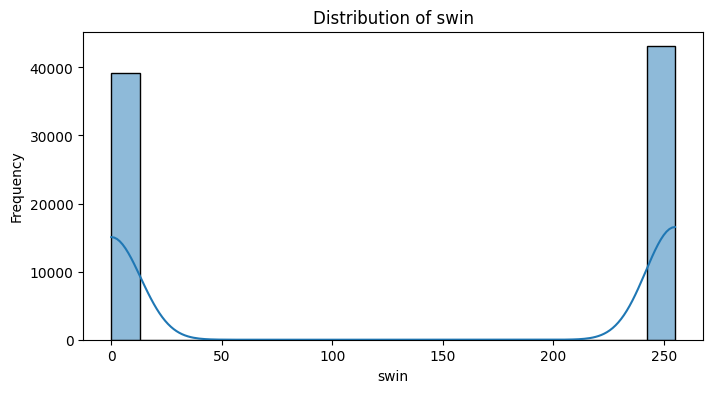

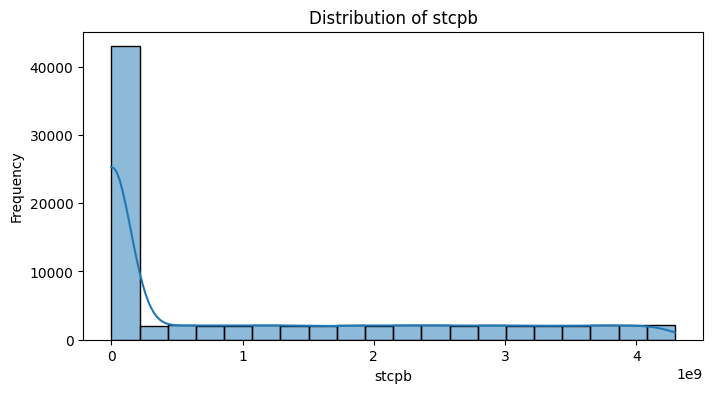

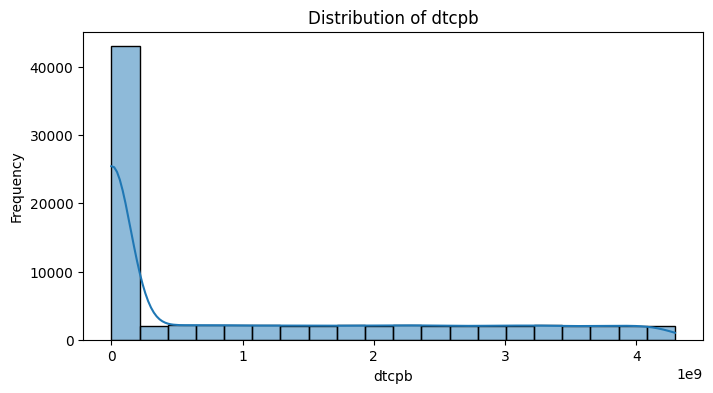

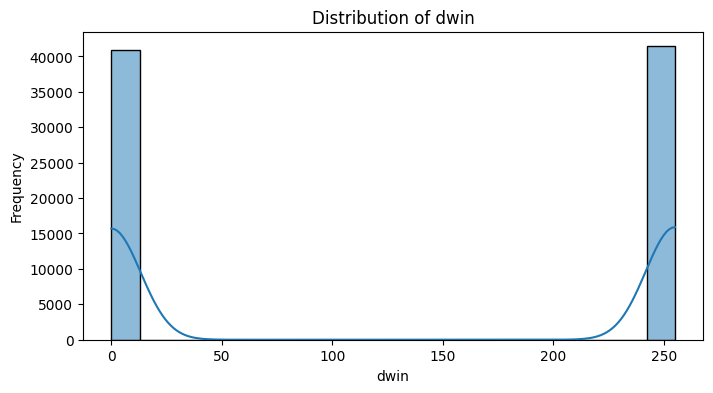

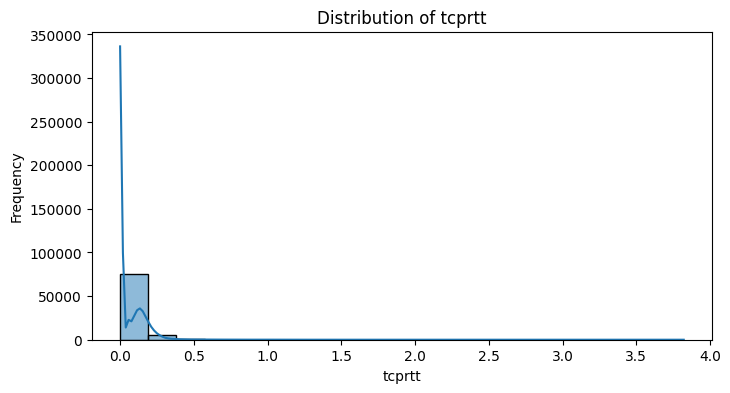

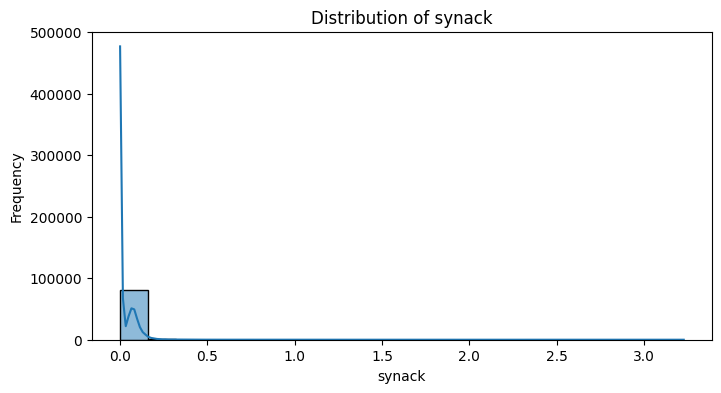

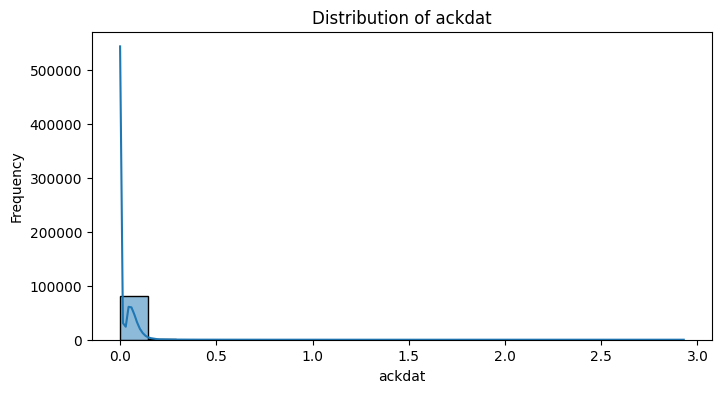

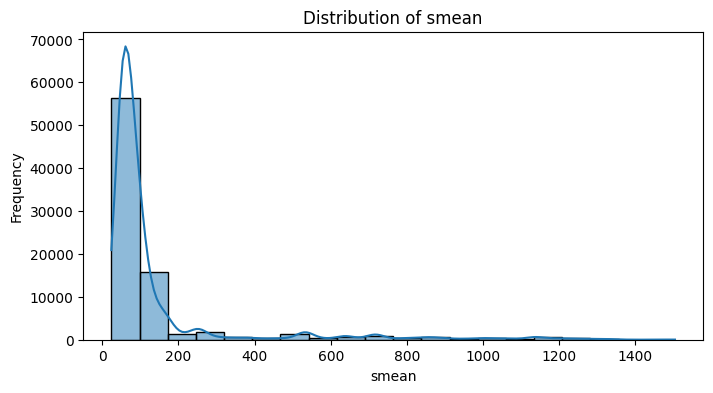

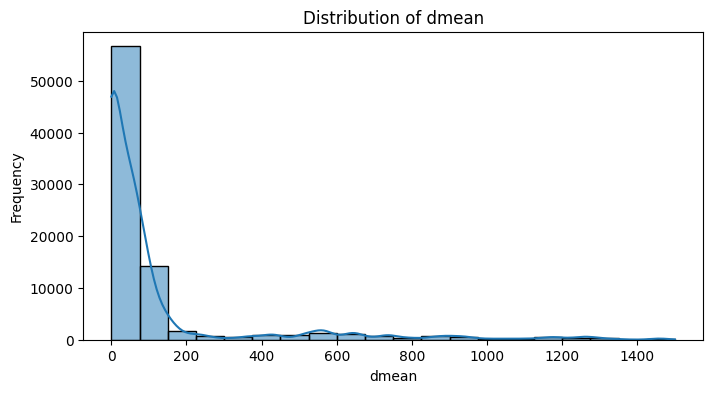

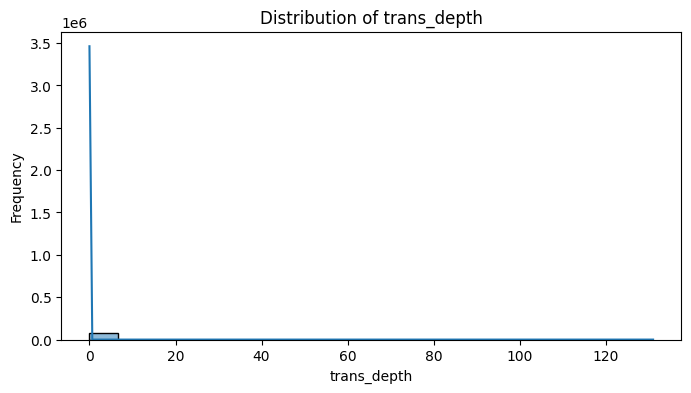

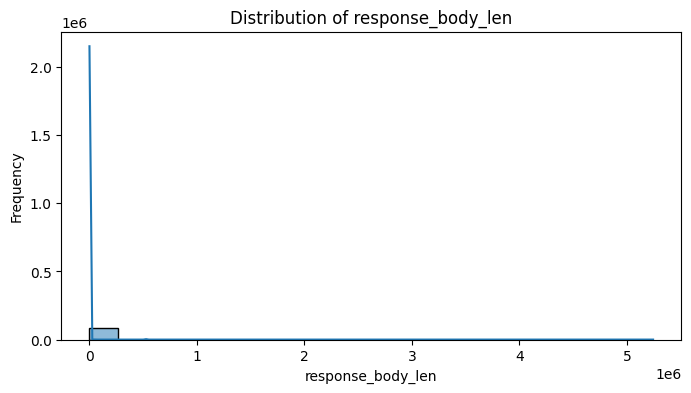

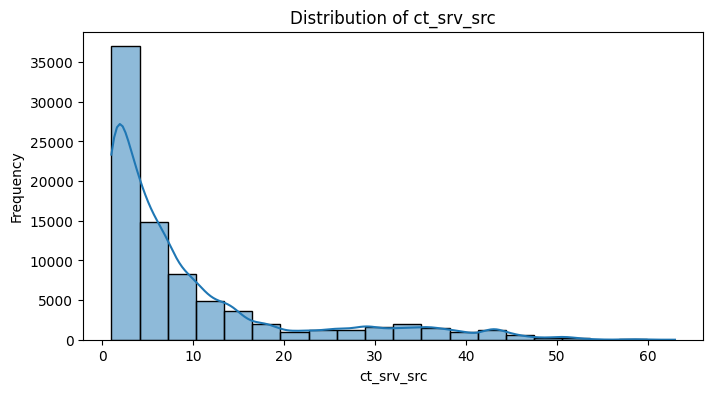

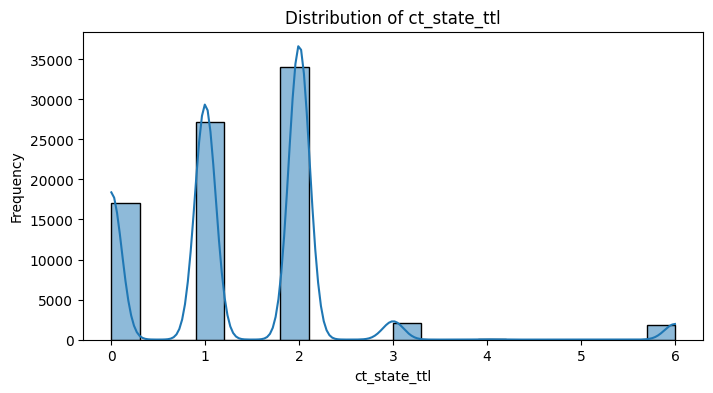

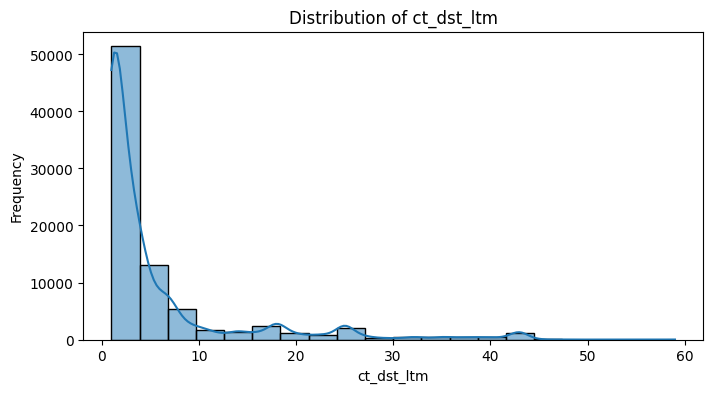

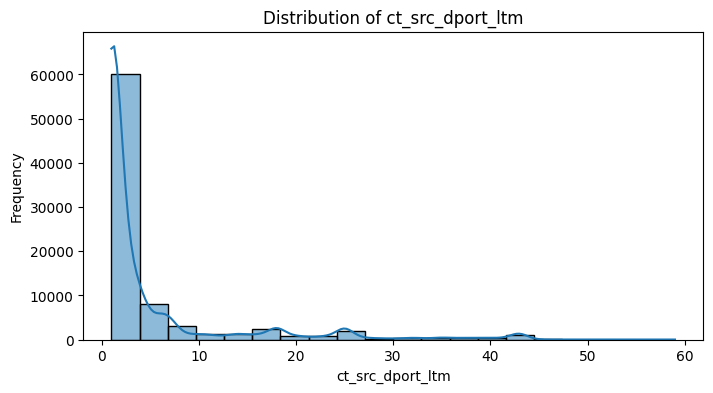

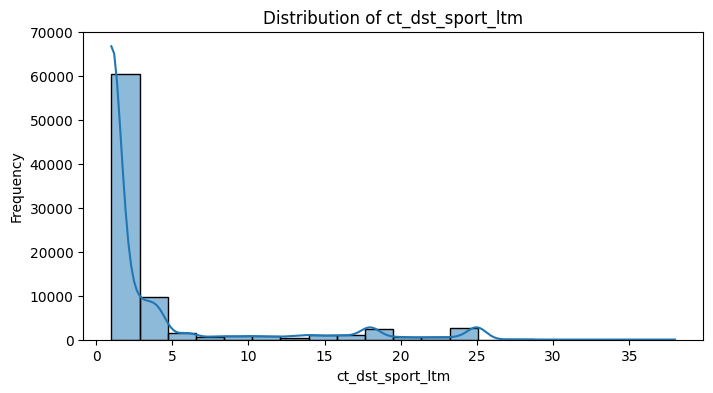

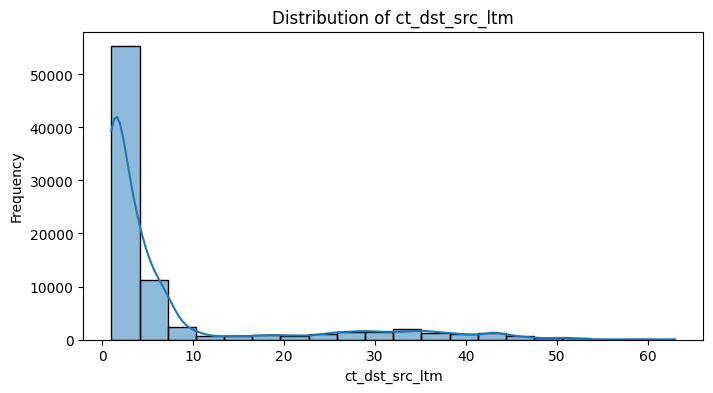

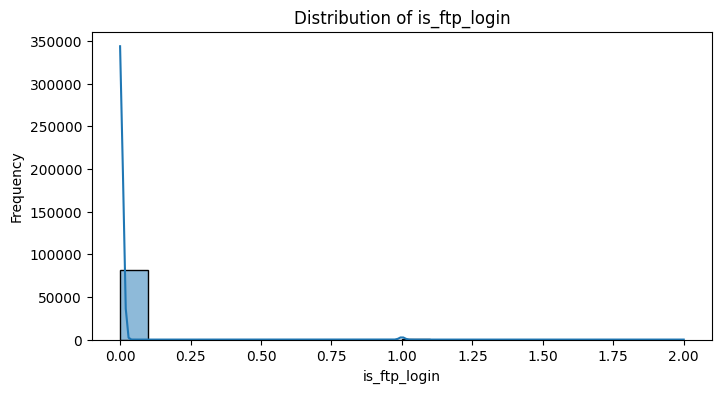

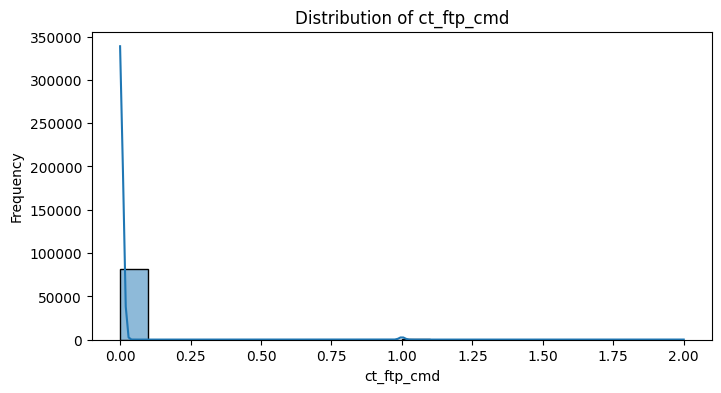

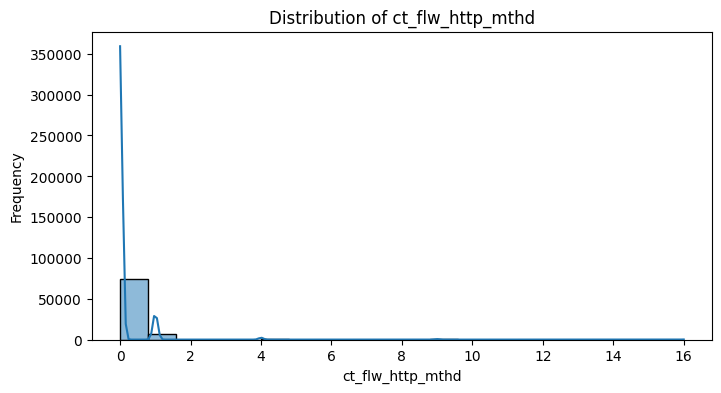

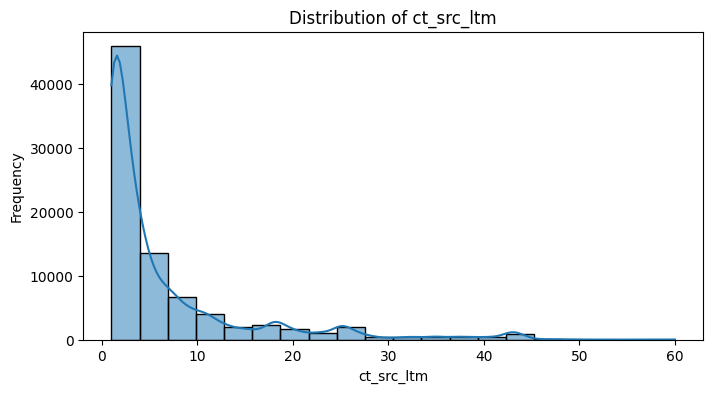

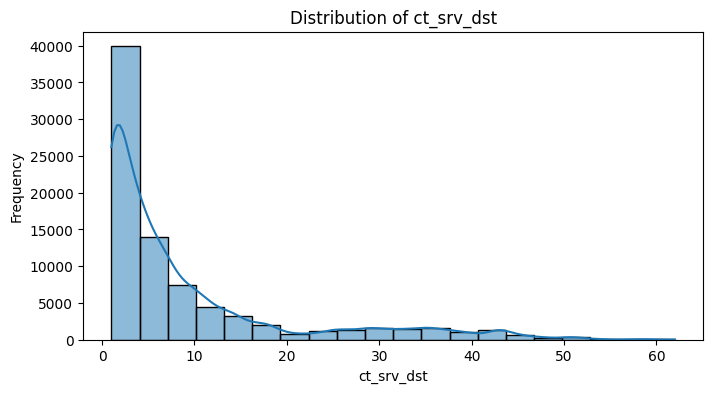

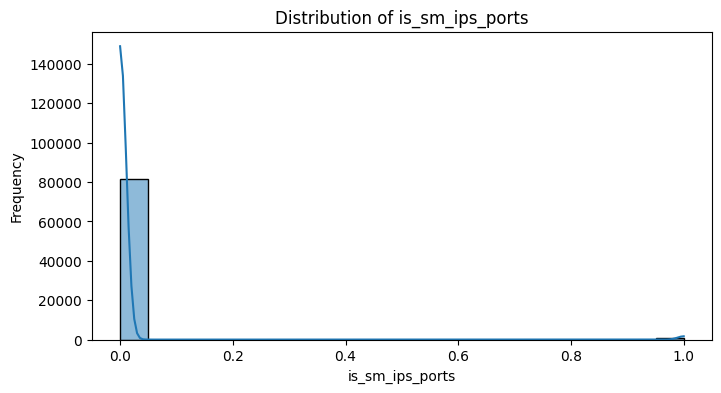

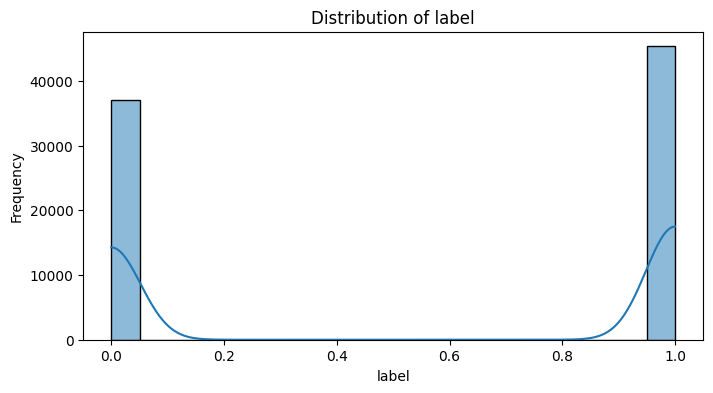

In [17]:
# Distribution of numerical features
num_features = train_data.select_dtypes(include=[np.number]).columns
for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

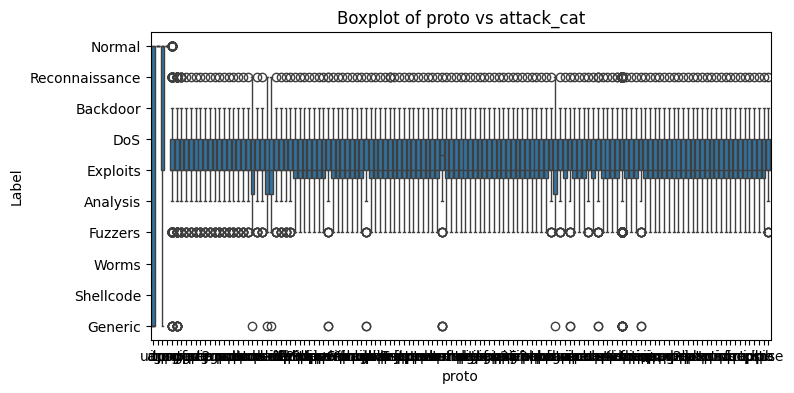

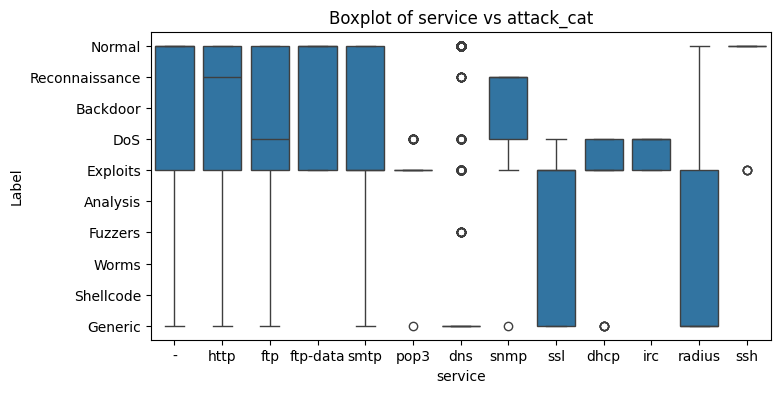

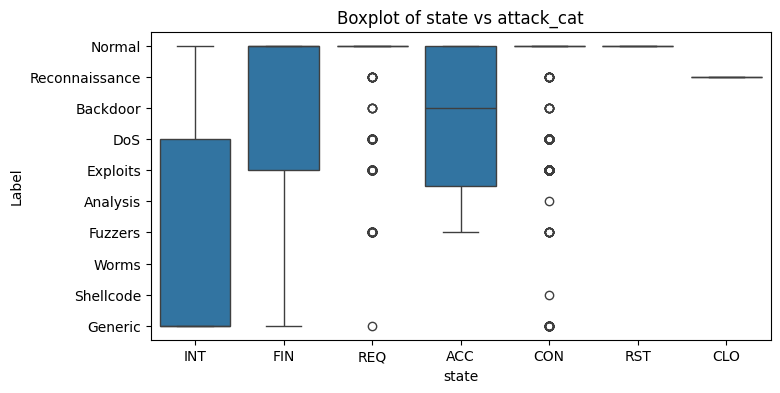

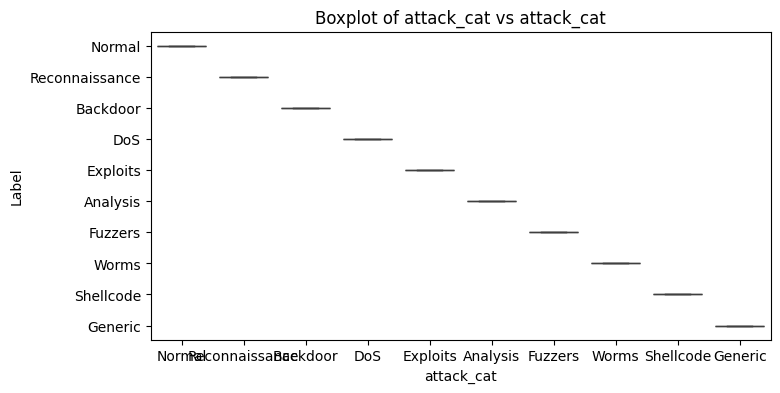

In [18]:
# Boxplot for categorical features
cat_features = train_data.select_dtypes(include=['object']).columns
for feature in cat_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=feature, y='attack_cat', data=train_data)
    plt.title(f'Boxplot of {feature} vs attack_cat')
    plt.xlabel(feature)
    plt.ylabel('Label')
    plt.show()

Outlier detection and handling



In [19]:
# Calculate IQR for numerical features
Q1 = train_data[num_features].quantile(0.25)
Q3 = train_data[num_features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((train_data[num_features] < (Q1 - 1.5 * IQR)) | (train_data[num_features] > (Q3 + 1.5 * IQR))).sum()
print("Outliers Detected:")
print(outliers)

Outliers Detected:
id                       0
dur                   5868
spkts                10196
dpkts                 8907
sbytes                9270
dbytes               12308
rate                  6201
sttl                     0
dttl                     0
sload                 6715
dload                18112
sloss                 5499
dloss                11272
sinpkt                5668
dinpkt                4717
sjit                  6321
djit                  8573
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                2020
synack                2954
ackdat                2480
smean                11928
dmean                 9902
trans_depth           7582
response_body_len     5657
ct_srv_src           10093
ct_state_ttl          1833
ct_dst_ltm           10479
ct_src_dport_ltm     11476
ct_dst_sport_ltm     10907
ct_dst_src_ltm       12789
is_ftp_login           678
ct_ftp_cmd             680
ct_flw_ht

In [20]:
# Explore distribution of categorical variables
cat_features = ['proto', 'service', 'state', 'attack_cat']
for feature in cat_features:
    print(train_data[feature].value_counts())


proto
tcp           43095
udp           29418
unas           3515
arp             987
ospf            676
              ...  
br-sat-mon       32
pvp              32
wsn              32
ib               31
igmp             30
Name: count, Length: 131, dtype: int64
service
-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: count, dtype: int64
state
FIN    39339
INT    34163
CON     6982
REQ     1842
ACC        4
RST        1
CLO        1
Name: count, dtype: int64
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64


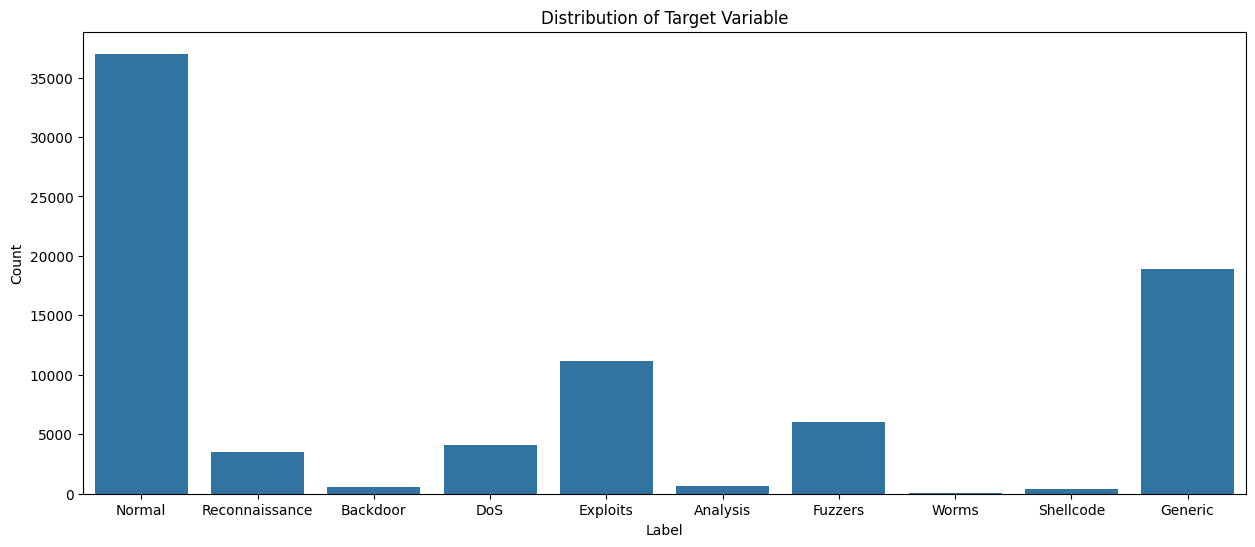

In [21]:
plt.figure(figsize=(15, 6))
sns.countplot(x='attack_cat', data=train_data)
plt.title('Distribution of Target Variable')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


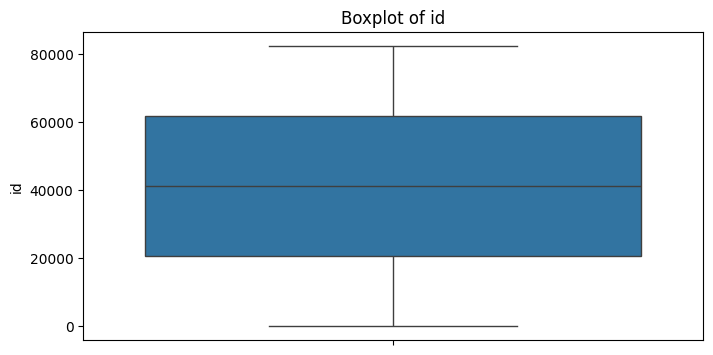

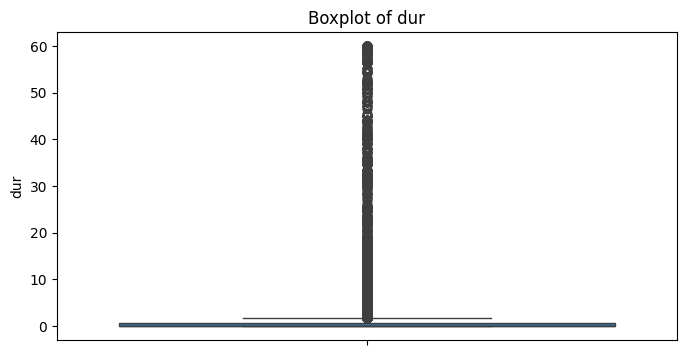

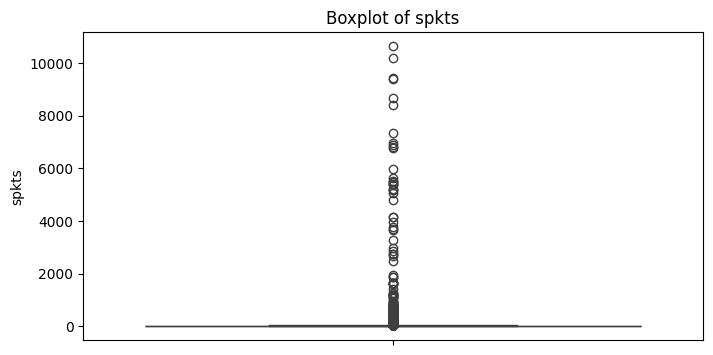

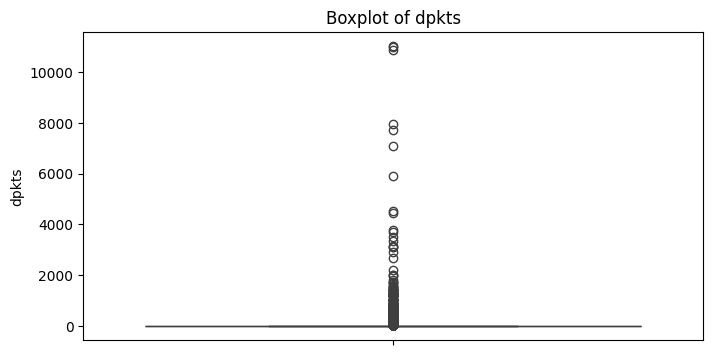

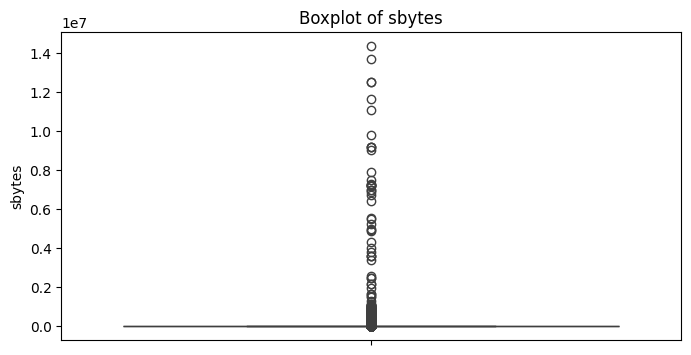

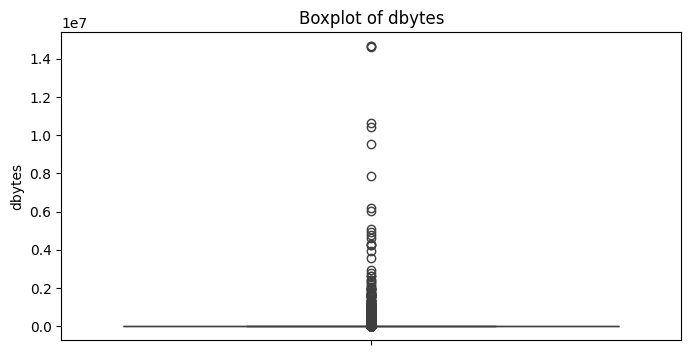

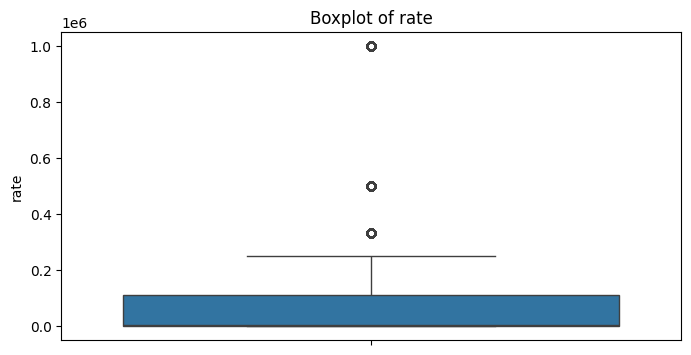

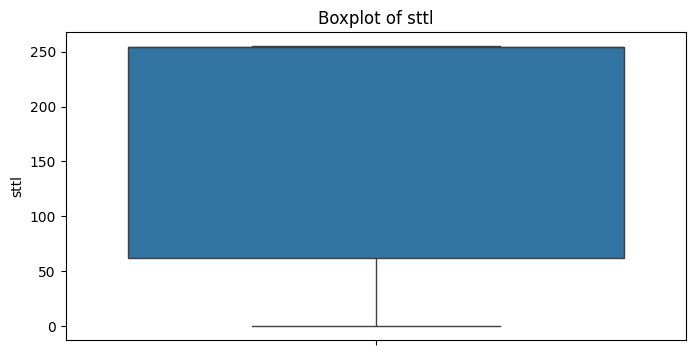

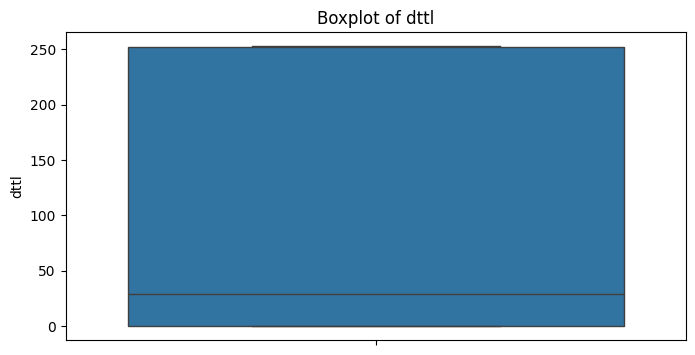

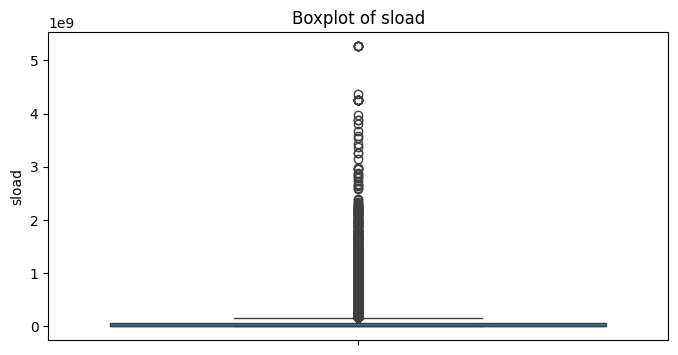

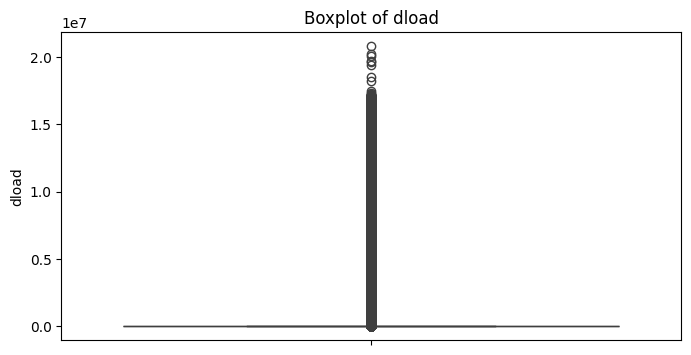

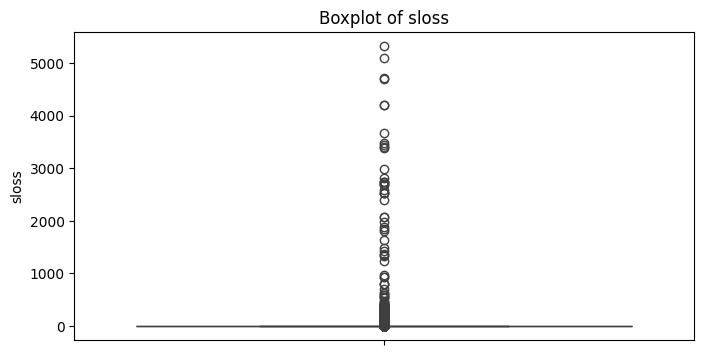

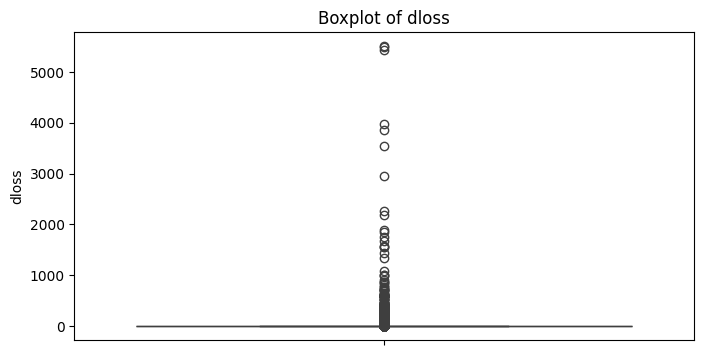

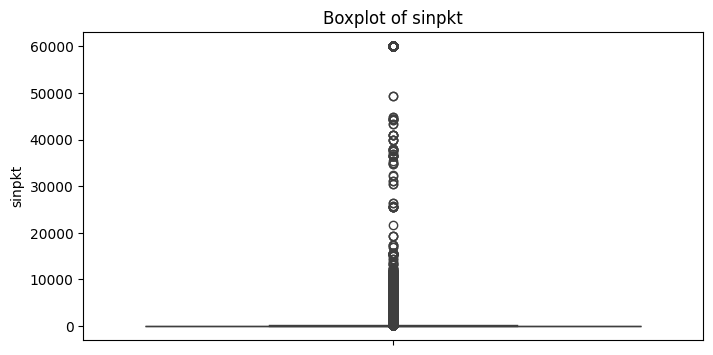

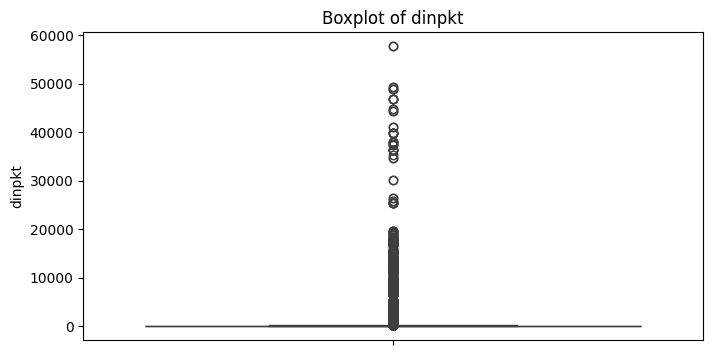

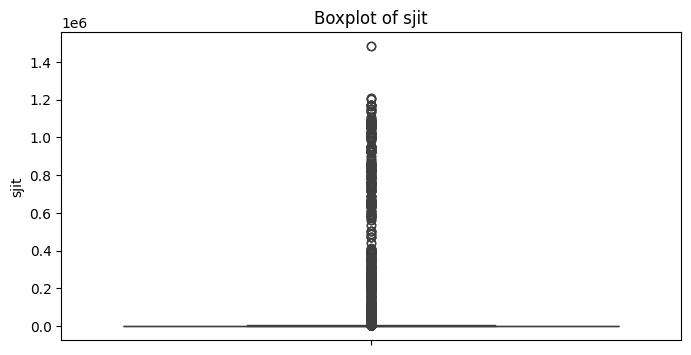

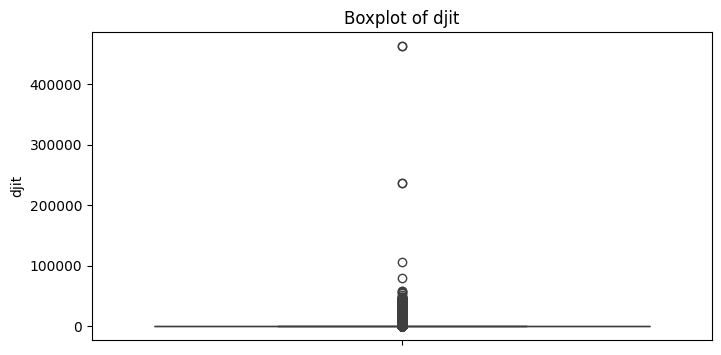

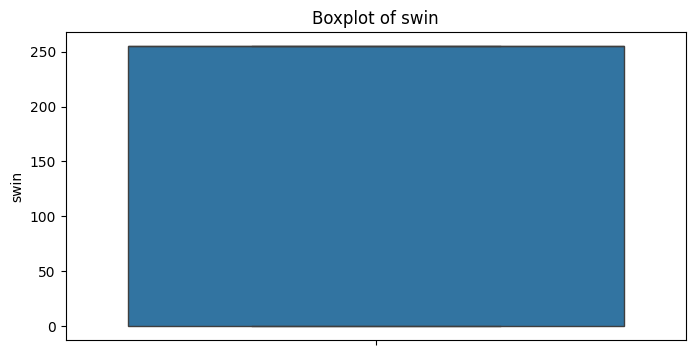

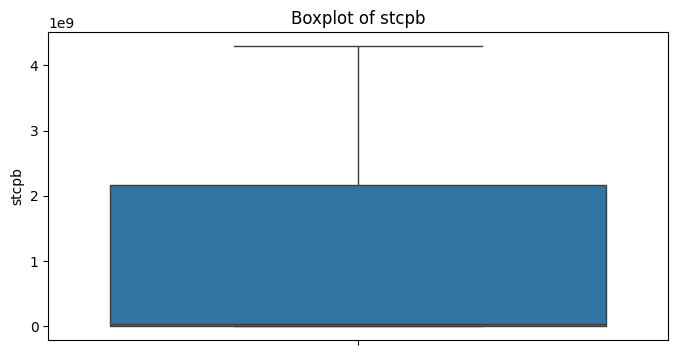

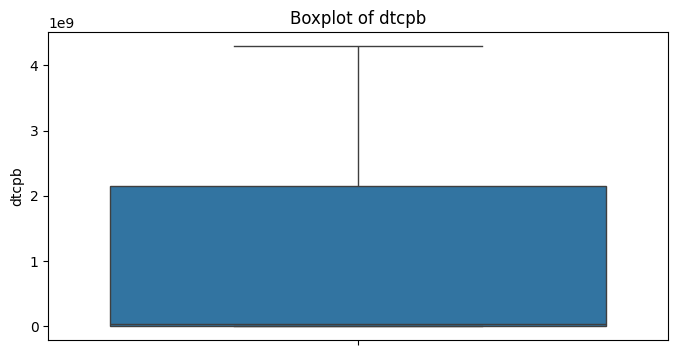

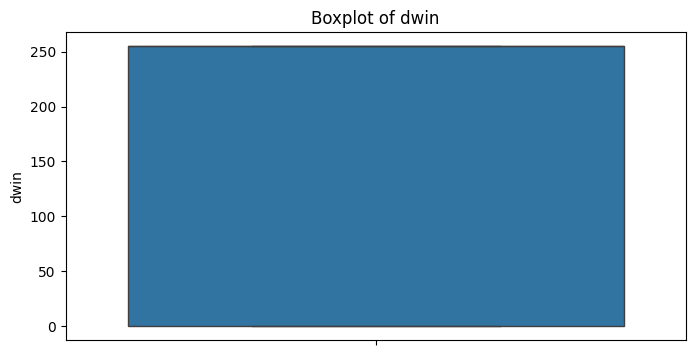

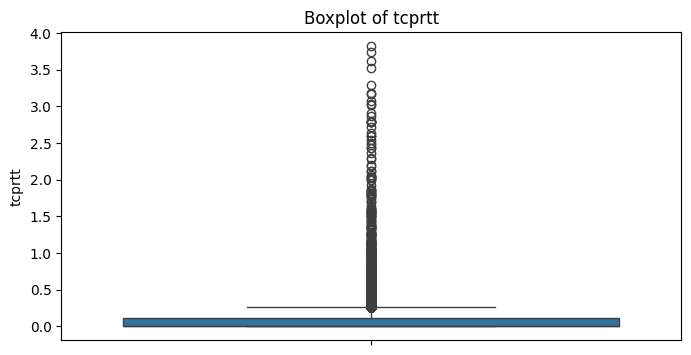

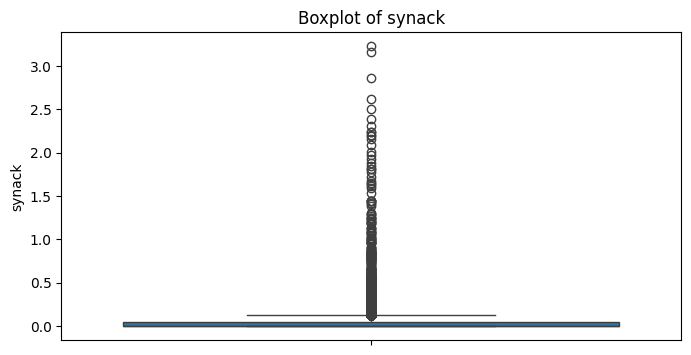

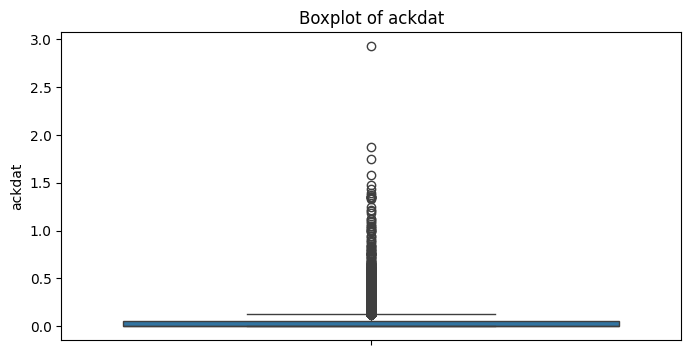

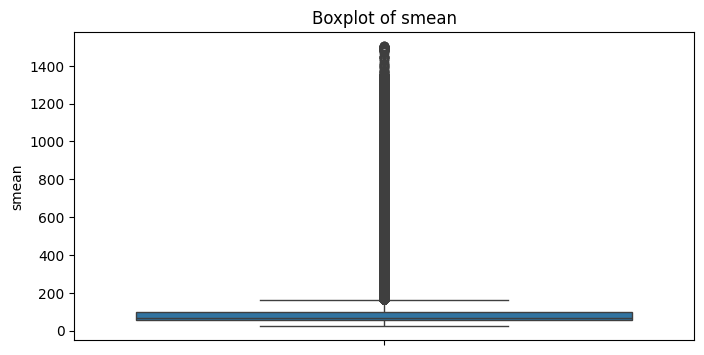

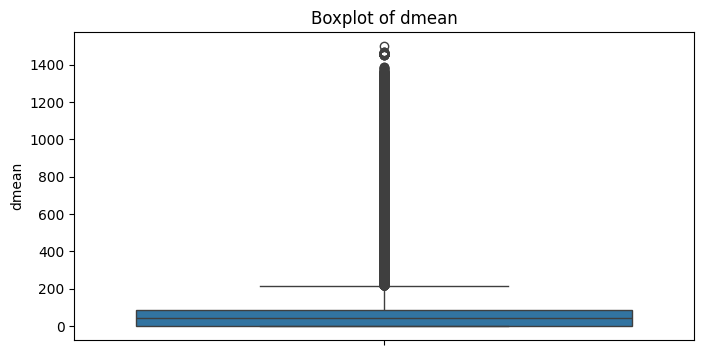

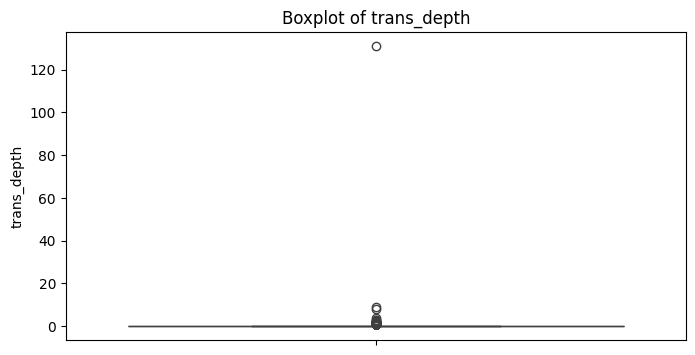

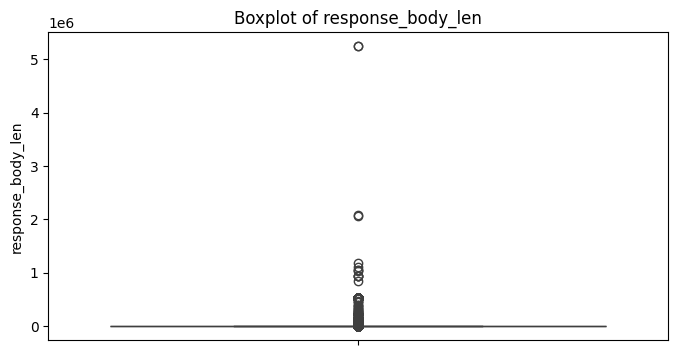

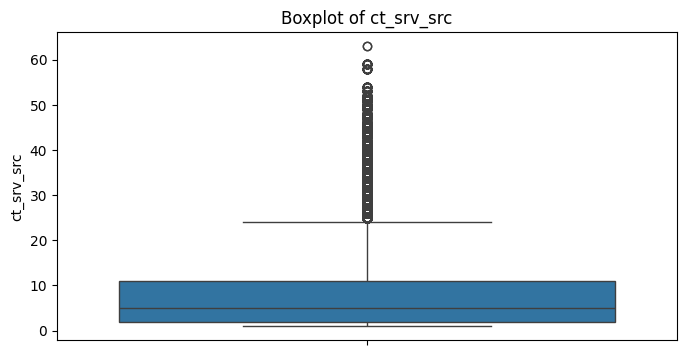

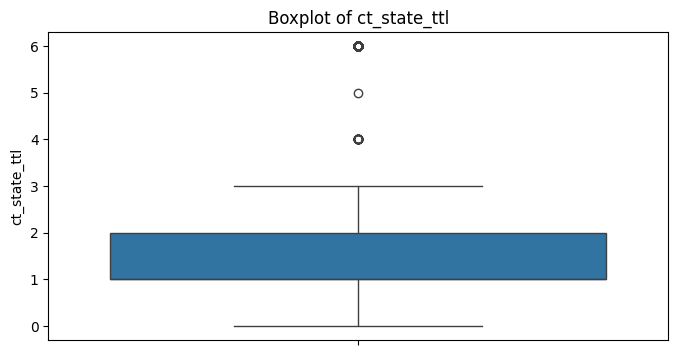

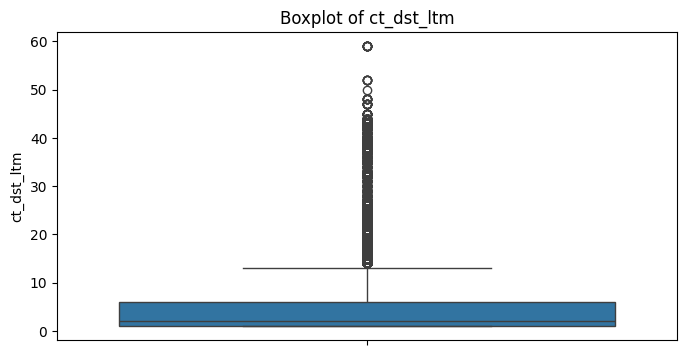

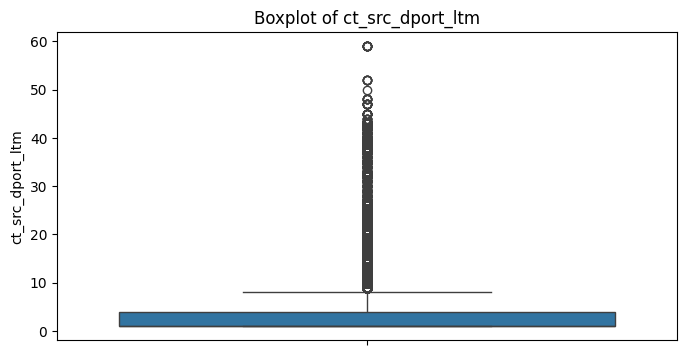

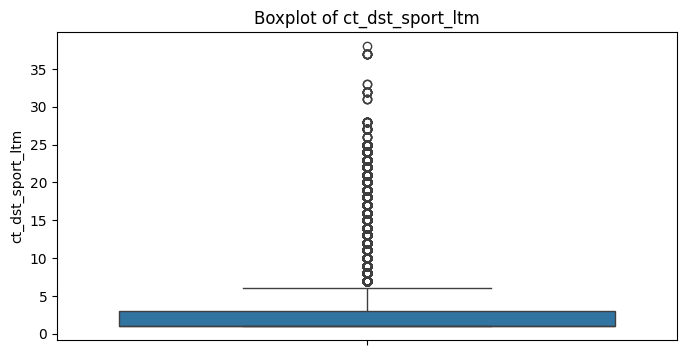

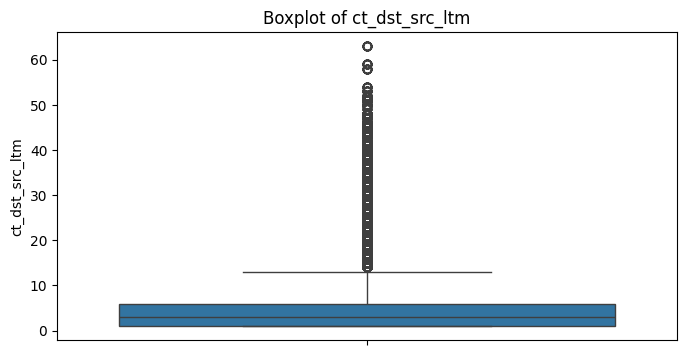

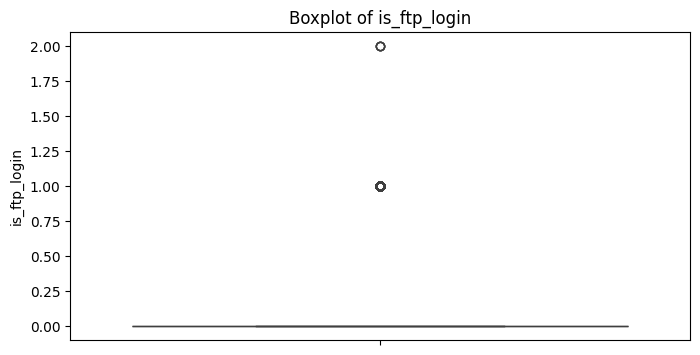

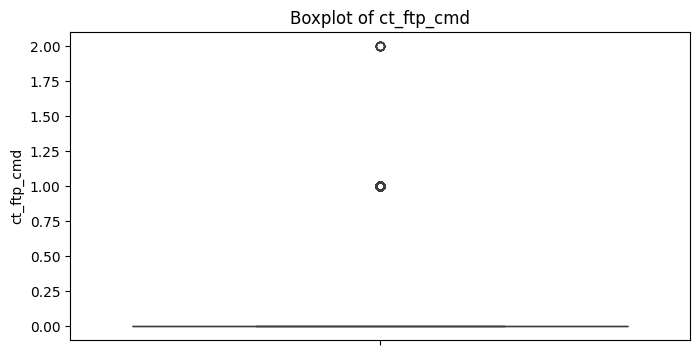

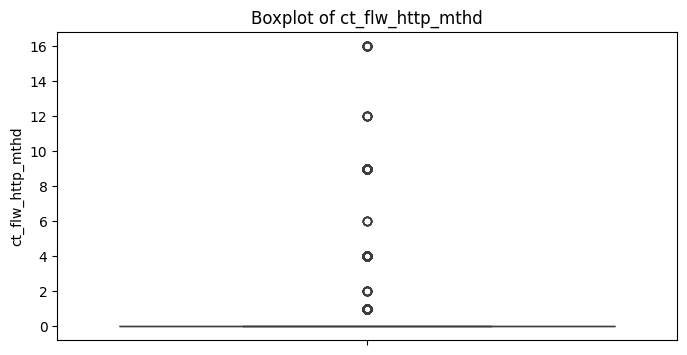

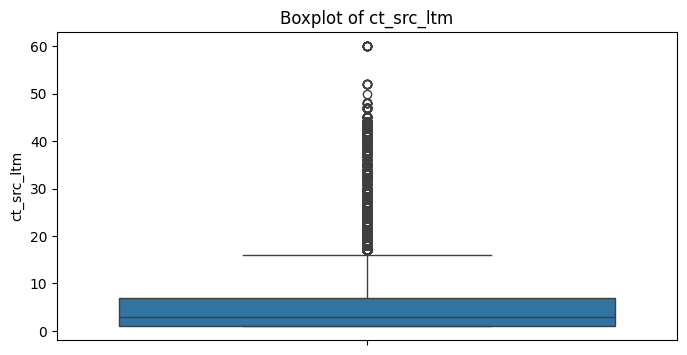

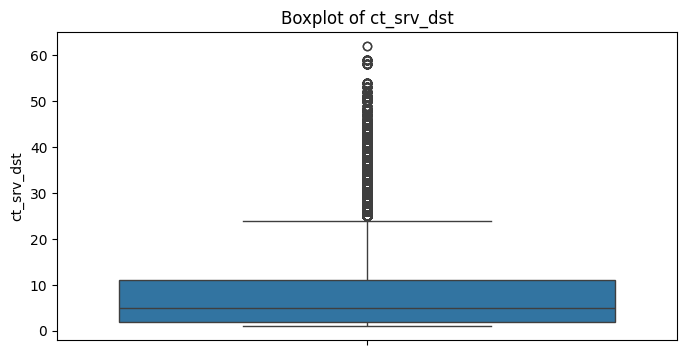

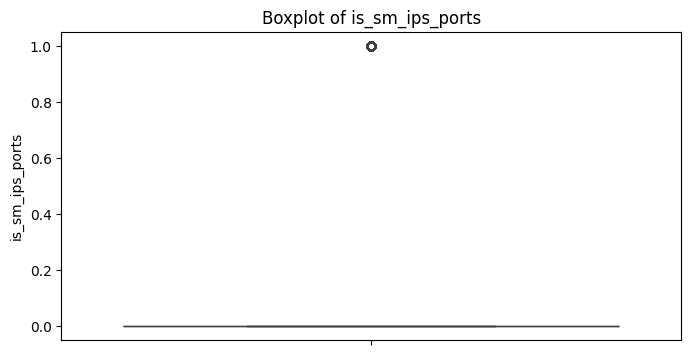

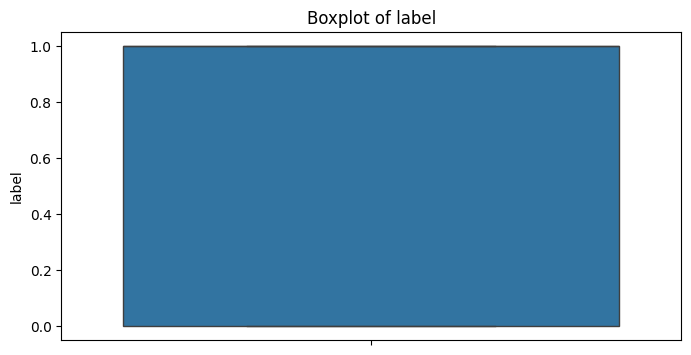

In [22]:
# Boxplot for numerical features
num_features = train_data.select_dtypes(include=[np.number]).columns
for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=feature, data=train_data)
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.show()


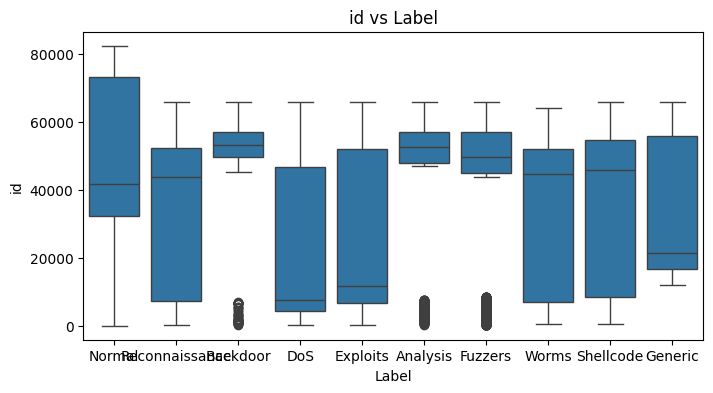

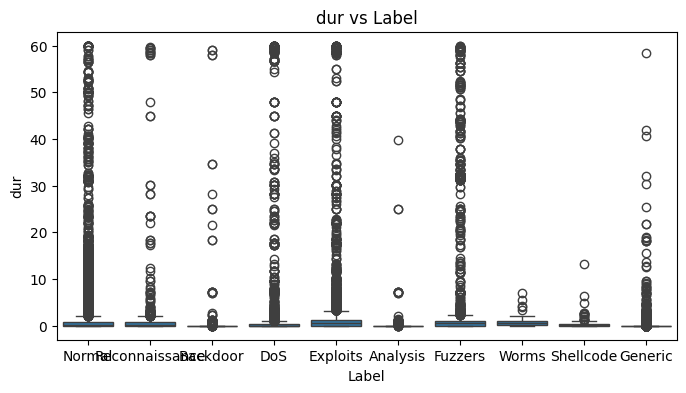

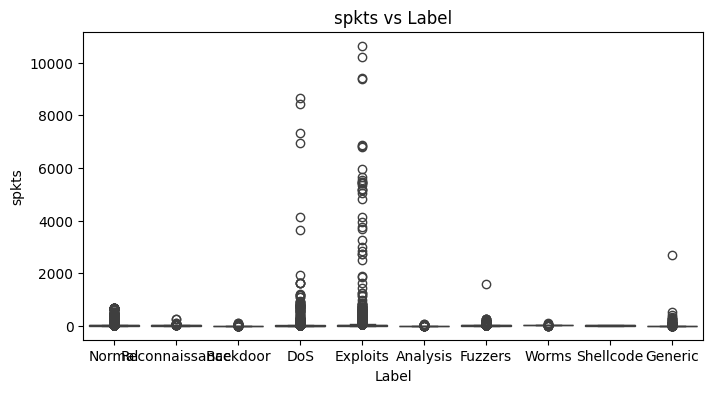

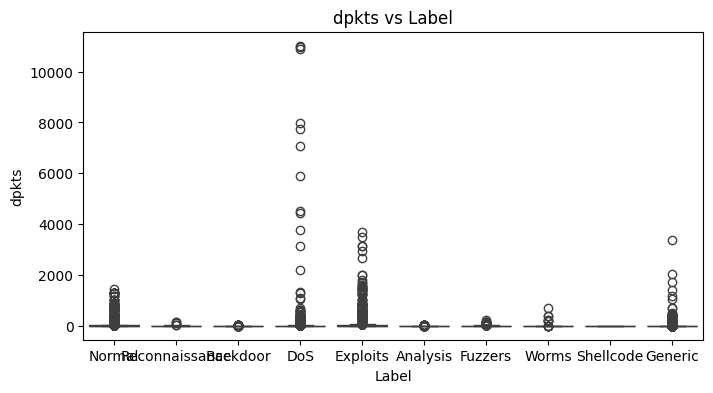

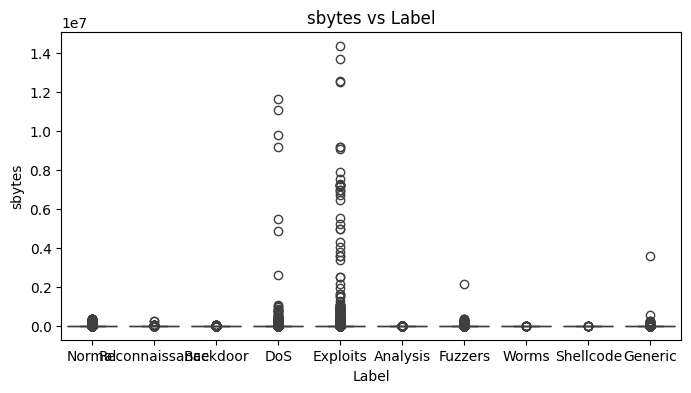

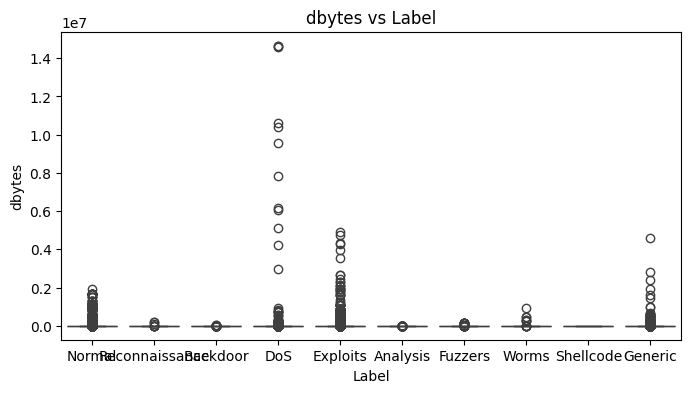

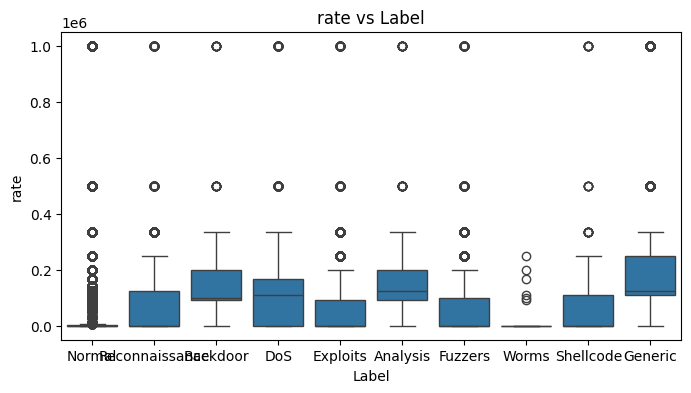

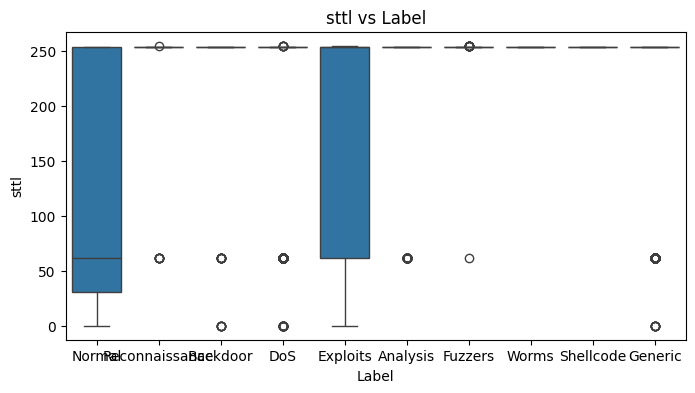

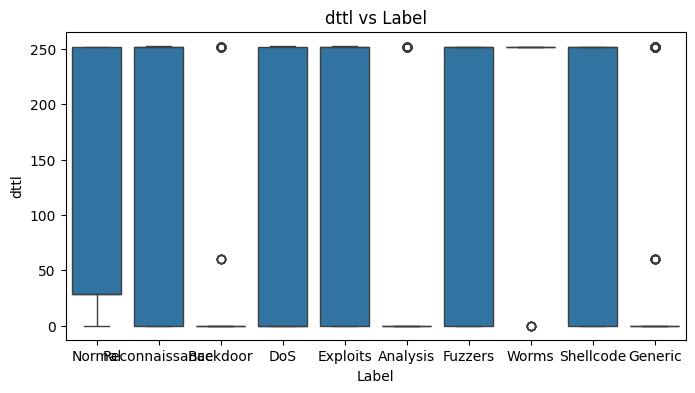

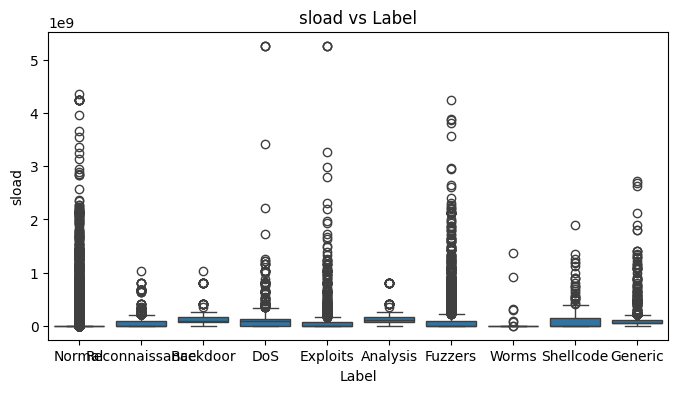

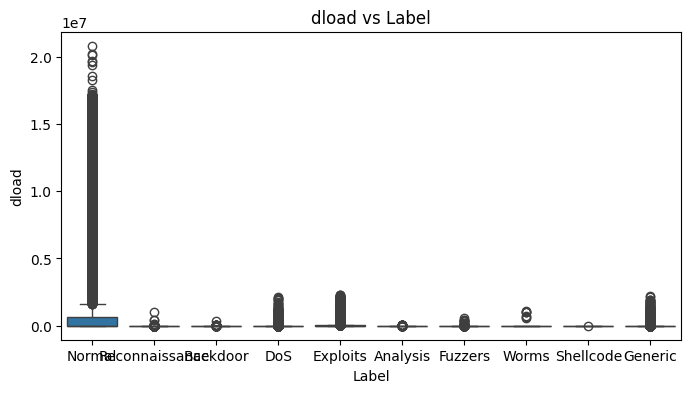

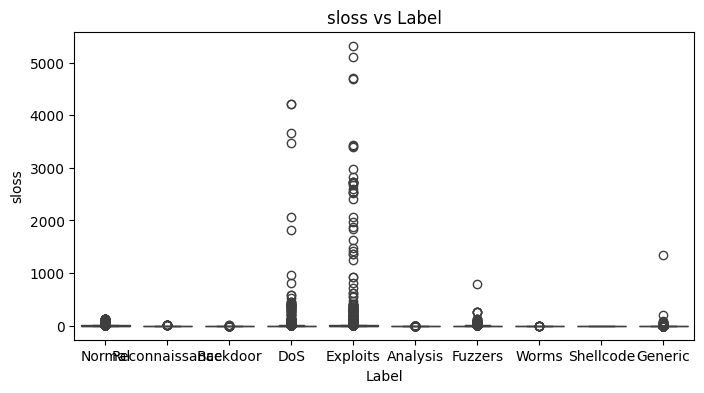

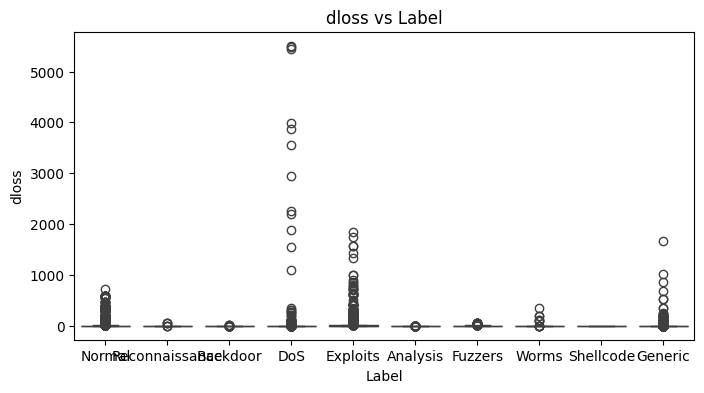

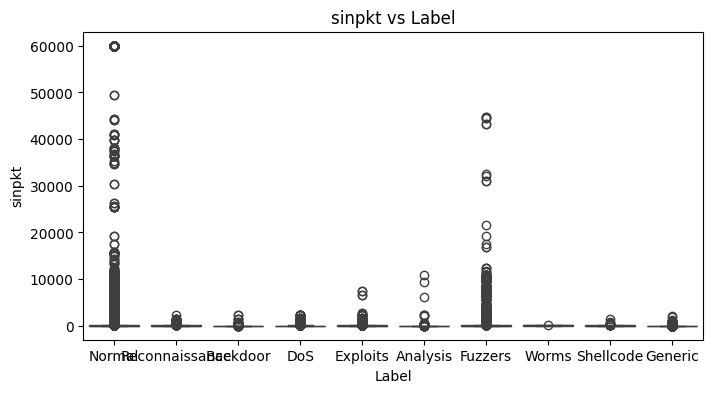

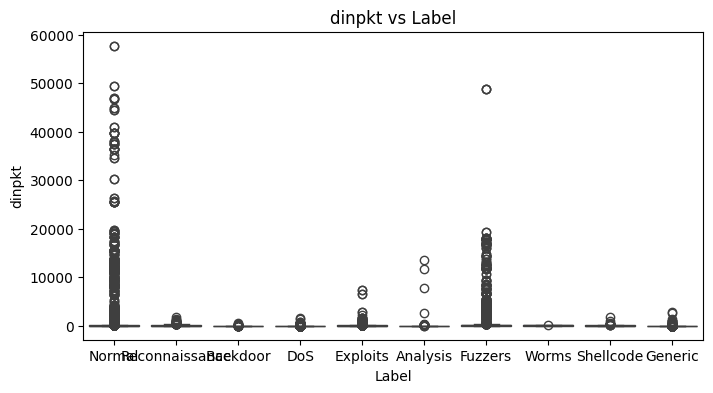

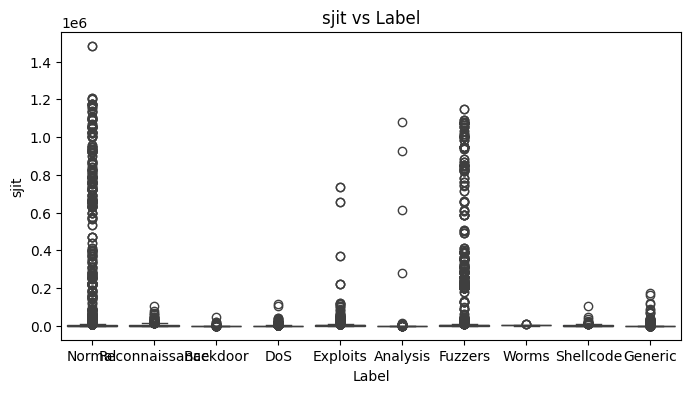

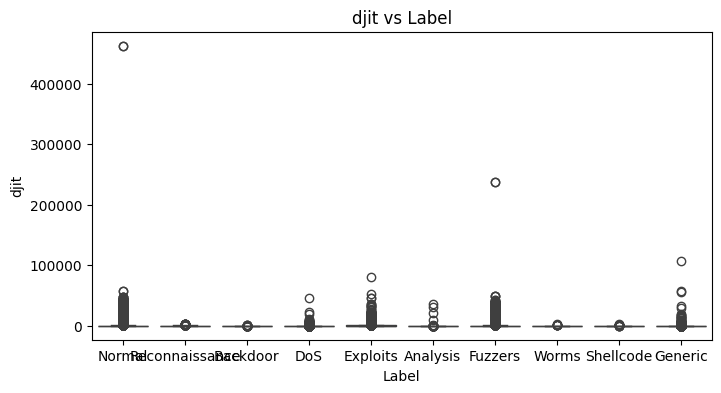

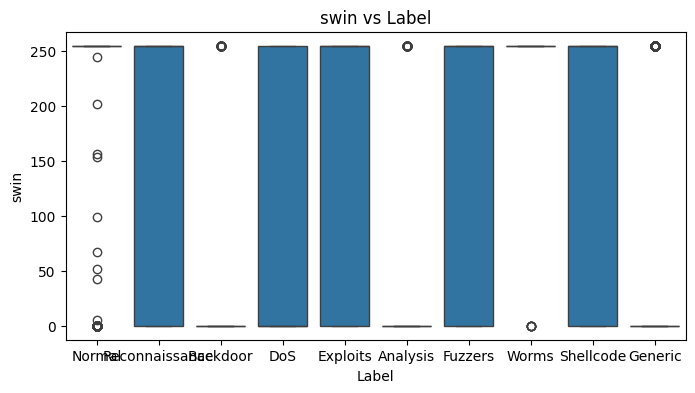

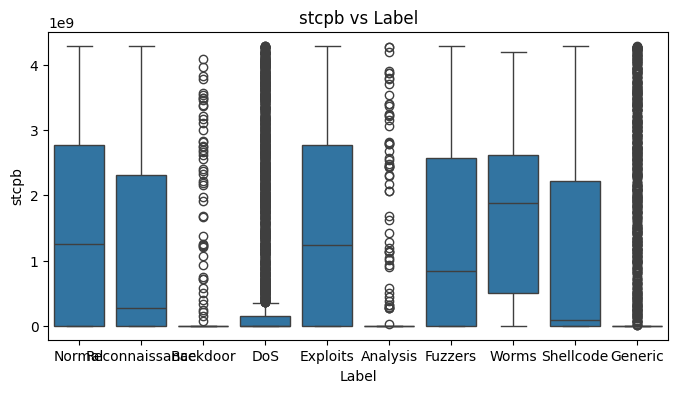

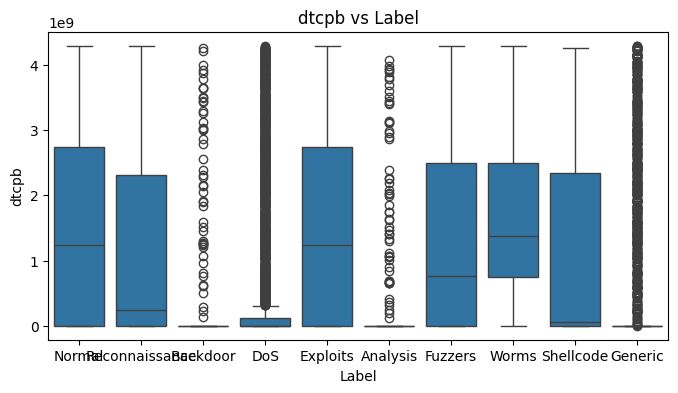

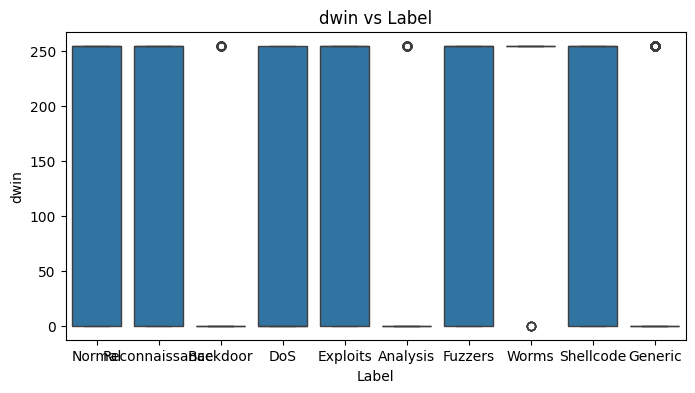

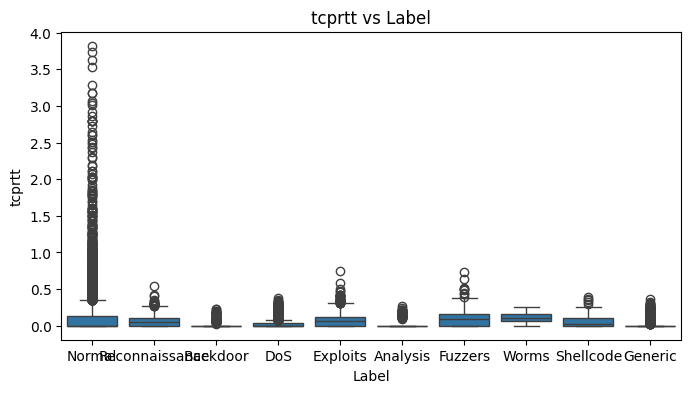

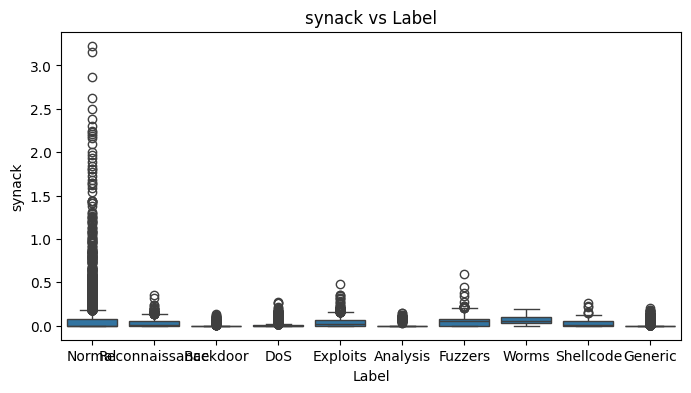

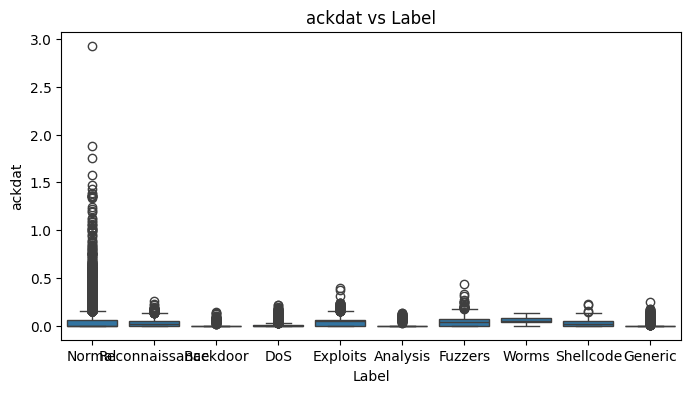

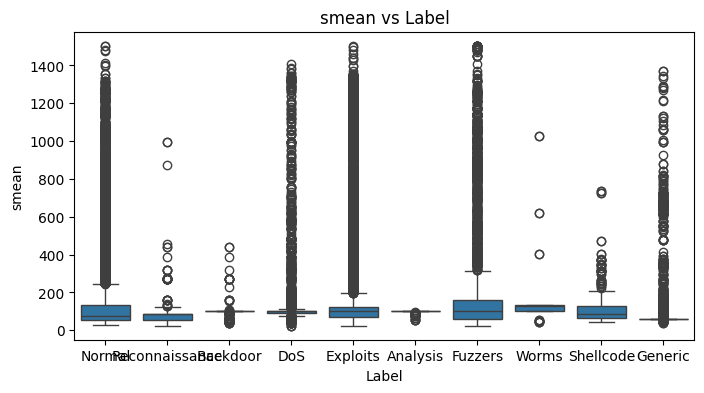

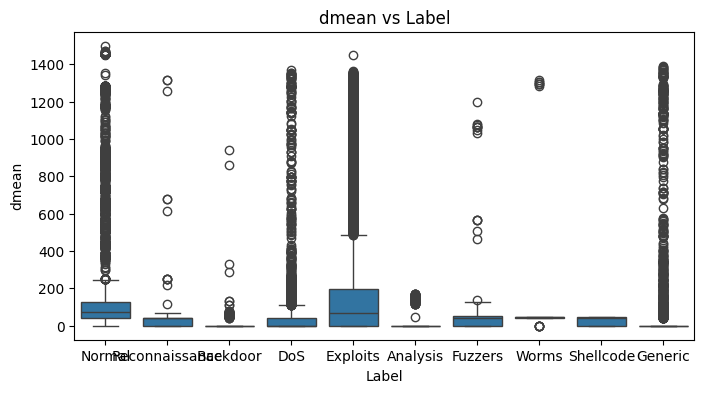

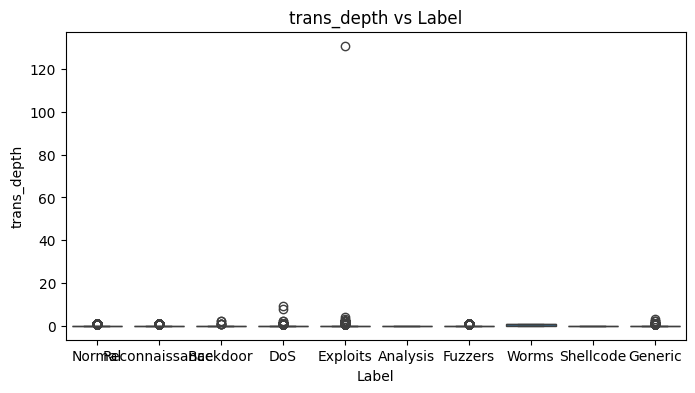

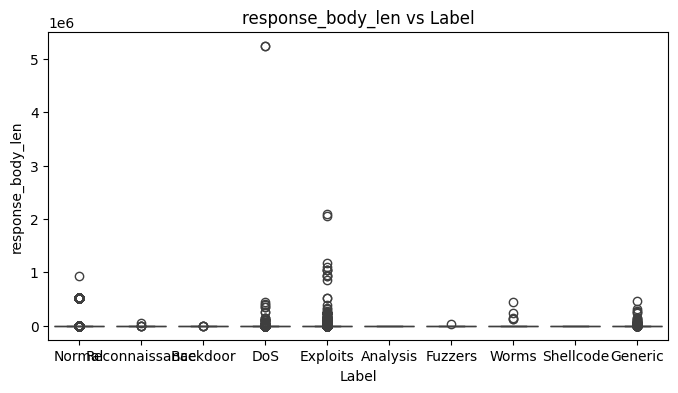

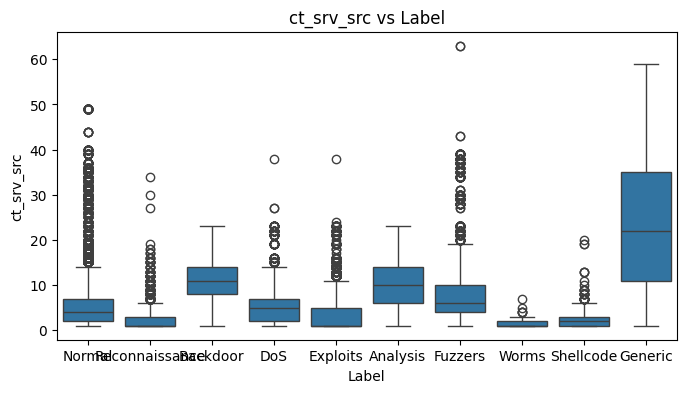

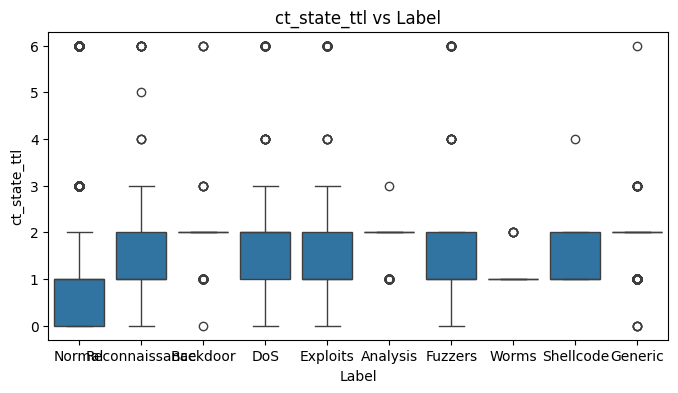

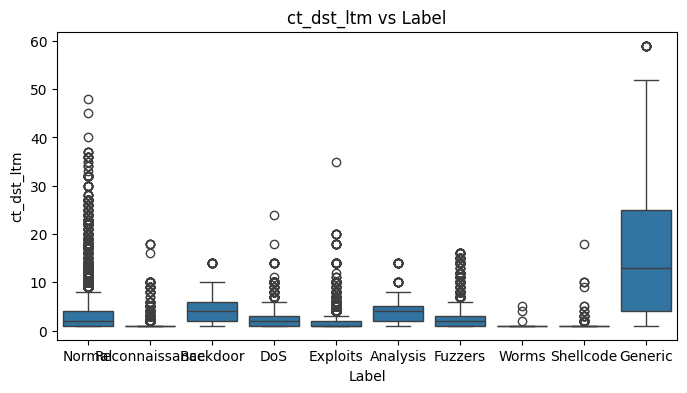

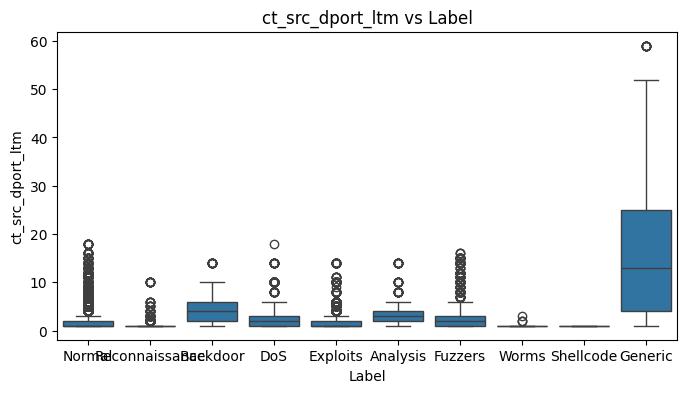

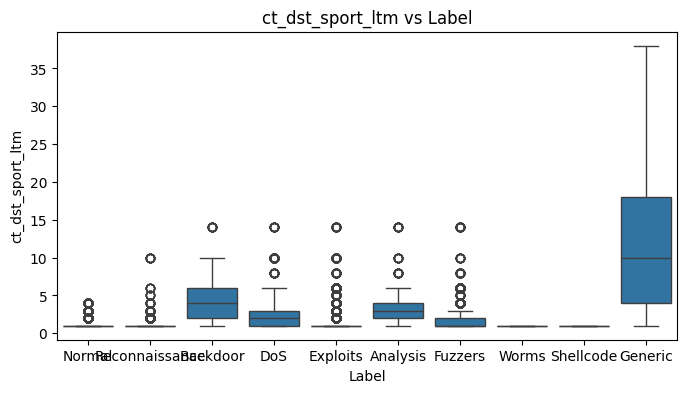

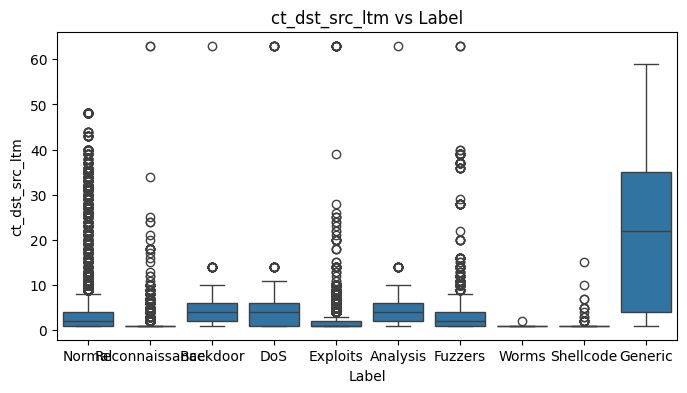

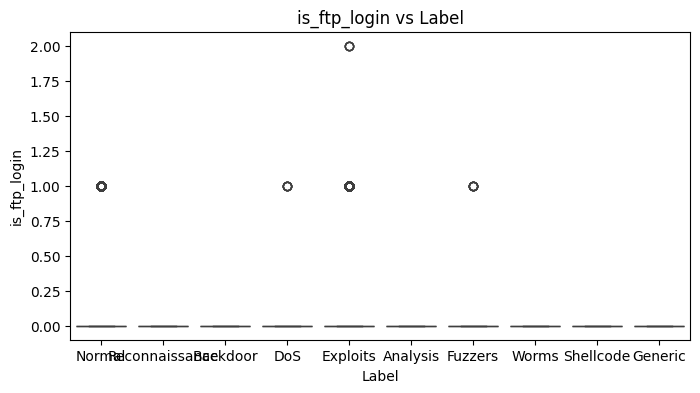

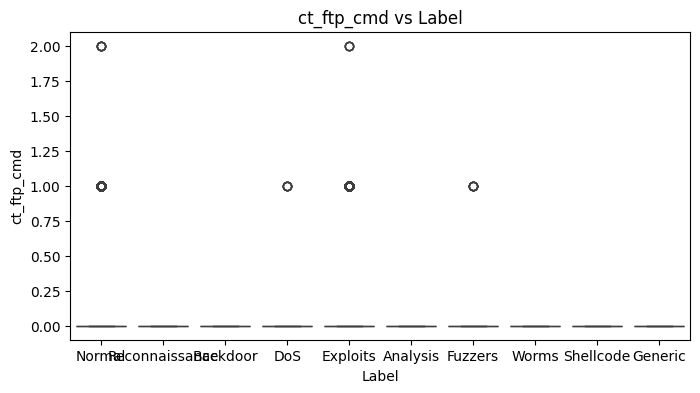

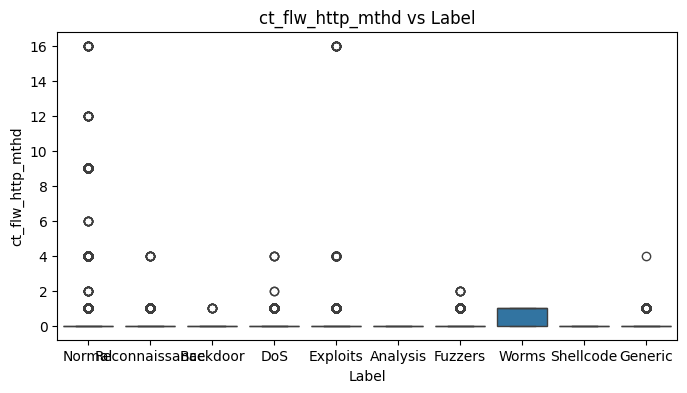

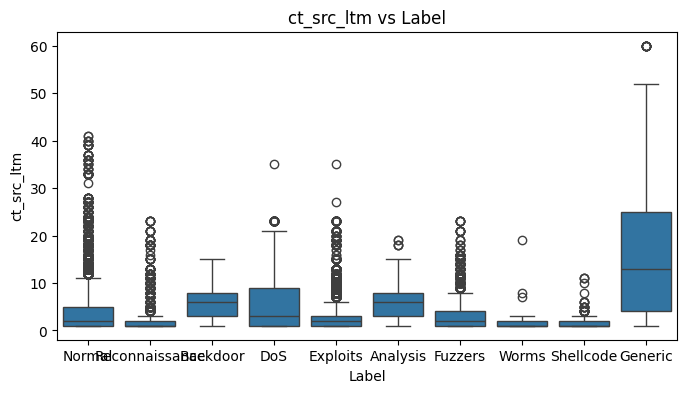

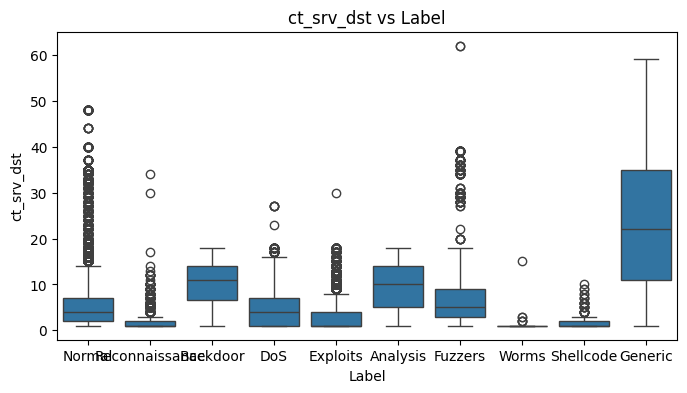

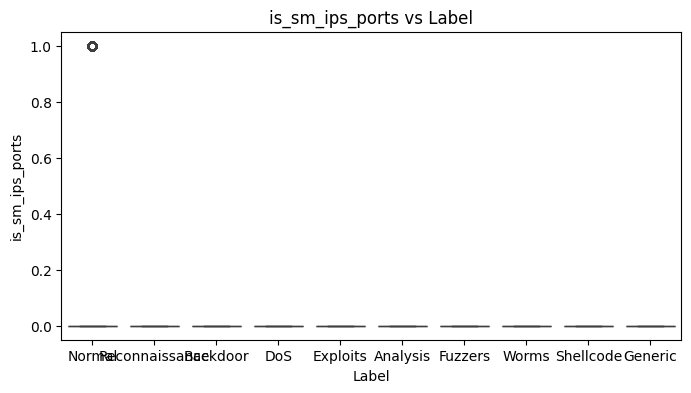

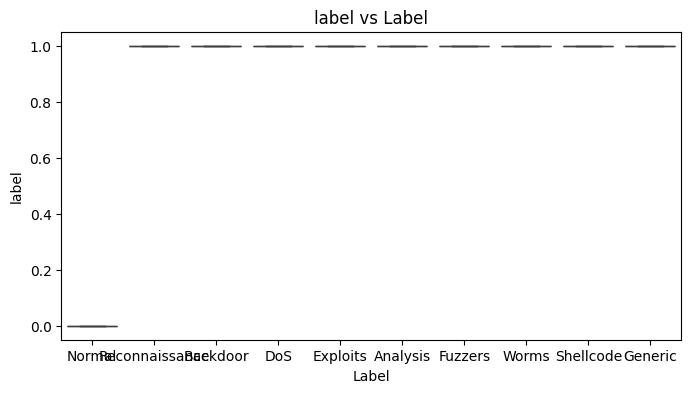

In [23]:
# Relationship between numerical features and target variable
for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='attack_cat', y=feature, data=train_data)
    plt.title(f'{feature} vs Label')
    plt.xlabel('Label')
    plt.ylabel(feature)
    plt.show()

In [24]:
# Importing necessary libraries
from scipy import interpolate

# Function to replace outliers with interpolated values
def replace_outliers_with_interpolation(data):
    for column in data.columns:
        # Check if the column is numerical and has outliers
        if data[column].dtype != 'object' and outliers[column] > 0:
            # Create a mask to identify outliers
            mask = ((data[column] < (Q1[column] - 1.5 * IQR[column])) |
                    (data[column] > (Q3[column] + 1.5 * IQR[column])))

            # Replace outliers with NaN for interpolation
            data.loc[mask, column] = np.nan

            # Linear interpolation
            data[column] = data[column].interpolate(method='linear')

    return data

# Replace outliers with linear interpolation
train_data_interpolated = replace_outliers_with_interpolation(train_data.copy())


In [25]:
test_data_interpolated = replace_outliers_with_interpolation(test_data.copy())

Outliers Treated

In [26]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Handle Categorical Variables
def encode_categorical(data):
    # One-Hot Encoding for 'proto', 'service', 'state'
    categorical_cols = ['proto', 'service', 'state']
    onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    encoded_cols = onehot_encoder.fit_transform(data[categorical_cols])

    # Create feature names for the encoded columns
    feature_names = []
    for i, col in enumerate(categorical_cols):
        values = sorted(data[col].unique())
        for value in values:
            feature_names.append(f"{col}_{value}")

    # Create DataFrame for the encoded columns
    encoded_cols_df = pd.DataFrame(encoded_cols, columns=feature_names)

    # Concatenate encoded columns with original data
    data = pd.concat([data, encoded_cols_df], axis=1)

    # Drop original categorical columns
    data.drop(categorical_cols, axis=1, inplace=True)

    return data

# Apply encoding to both train and test data
train_data_encoded = encode_categorical(train_data_interpolated)
test_data_encoded = encode_categorical(test_data_interpolated)

# Label Encoding for the target variable 'attack_cat'
label_encoder = LabelEncoder()
train_data_encoded['attack_cat'] = label_encoder.fit_transform(train_data_encoded['attack_cat'])

# Display the first few rows of the encoded data
print(train_data_encoded.head())
print(test_data_encoded.head())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   id       dur  spkts  dpkts  sbytes  dbytes         rate  sttl  dttl  sload  \
0   1  0.000011    2.0    0.0   496.0     0.0   90909.0902   254     0    NaN   
1   2  0.000008    2.0    0.0  1762.0     0.0  125000.0003   254     0    NaN   
2   3  0.000005    2.0    0.0  1068.0     0.0  200000.0051   254     0    NaN   
3   4  0.000006    2.0    0.0   900.0     0.0  166666.6608   254     0    NaN   
4   5  0.000010    2.0    0.0  2126.0     0.0  100000.0025   254     0    NaN   

   ...  service_snmp  service_ssh  service_ssl  state_ACC  state_CLO  \
0  ...           0.0          0.0          0.0        0.0        0.0   
1  ...           0.0          0.0          0.0        0.0        0.0   
2  ...           0.0          0.0          0.0        0.0        0.0   
3  ...           0.0          0.0          0.0        0.0        0.0   
4  ...           0.0          0.0          0.0        0.0        0.0   

   state_CON  state_FIN  state_INT  state_REQ  state_RST  
0        0.0        0

In [27]:
# Splitting the data into features (X) and target variable (y)
X = train_data_encoded.drop('attack_cat', axis=1)
y = train_data_encoded['attack_cat']

In [28]:
print(train_data_encoded.columns)

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload',
       ...
       'service_snmp', 'service_ssh', 'service_ssl', 'state_ACC', 'state_CLO',
       'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST'],
      dtype='object', length=193)


In [29]:
train_data['attack_cat'].value_counts()

attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
y_test.shape

(16467,)

In [32]:
# Identify columns with non-numeric values
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns
print("Columns with non-numeric values:", non_numeric_columns)


Columns with non-numeric values: Index([], dtype='object')


In [33]:
X_train.isnull().sum()

id           0
dur          0
spkts        0
dpkts        0
sbytes       0
            ..
state_CON    0
state_FIN    0
state_INT    0
state_REQ    0
state_RST    0
Length: 192, dtype: int64

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [35]:
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [36]:
# Machine Learning Model: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_imputed, y_train)
rf_predictions = rf_model.predict(X_test_imputed)

In [37]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8970668609947167


In [38]:
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.08      0.05      0.06       131
           1       0.01      0.01      0.01       117
           2       0.42      0.36      0.39       786
           3       0.70      0.79      0.74      2275
           4       0.81      0.87      0.84      1212
           5       1.00      0.97      0.98      3723
           6       1.00      1.00      1.00      7418
           7       0.88      0.78      0.83       723
           8       0.63      0.51      0.56        75
           9       0.00      0.00      0.00         7

    accuracy                           0.90     16467
   macro avg       0.55      0.53      0.54     16467
weighted avg       0.89      0.90      0.90     16467



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# Deep Learning Model: Multi-Layer Perceptron (MLP)
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train_imputed, y_train)
mlp_predictions = mlp_model.predict(X_test_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [40]:
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
print("MLP Accuracy:", mlp_accuracy)

MLP Accuracy: 0.41944495050707475


In [41]:
df.head()

Destination Port   Flow Duration   Total Fwd Packets  \
0                 80           38308                   1   
1                389             479                  11   
2                 88            1095                  10   
3                389           15206                  17   
4                 88            1092                   9   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                            6   
1                        5                          172   
2                        6                         3150   
3                       12                         3452   
4                        6                         3150   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             6                       6   
1                           326                      79   
2                          3150                    1575   
3                          6660                    1313   
4                          3152                    1575   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       6                 6.000000                0.000000   
1                       0                15.636364               31.449238   
2                       0               315.000000              632.561635   
3                       0               203.058823              425.778474   
4                       0               350.000000              694.509719   

   ...   min_seg_size_forward  Active Mean   Active Std   Active Max  \
0  ...                     20          0.0          0.0            0   
1  ...                     32          0.0          0.0            0   
2  ...                     32          0.0          0.0            0   
3  ...                     32          0.0          0.0            0   
4  ...                     32          0.0          0.0            0   

    Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0            0        0.0        0.0          0          0  BENIGN  
1            0        0.0        0.0          0          0  BENIGN  
2            0        0.0        0.0          0          0  BENIGN  
3            0        0.0        0.0          0          0  BENIGN  
4            0        0.0        0.0          0          0  BENIGN  

[5 rows x 79 columns]

In [42]:
print("MLP Classifier:")
print(classification_report(y_test, mlp_predictions))

MLP Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.00      0.00      0.00       117
           2       0.27      0.04      0.07       786
           3       0.22      0.81      0.34      2275
           4       0.13      0.08      0.10      1212
           5       0.81      0.61      0.70      3723
           6       0.63      0.36      0.46      7418
           7       0.19      0.01      0.01       723
           8       0.00      0.00      0.00        75
           9       0.00      0.00      0.00         7

    accuracy                           0.42     16467
   macro avg       0.23      0.19      0.17     16467
weighted avg       0.53      0.42      0.42     16467



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
logistic_regression = LogisticRegression()


In [45]:
# Train and evaluate Logistic Regression
logistic_regression.fit(X_train_imputed, y_train)
y_pred_lr = logistic_regression.predict(X_test_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Accuracy:", lr_accuracy)

Logistic Accuracy: 0.5552924029877938


In [47]:
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.00      0.00      0.00       117
           2       0.00      0.00      0.00       786
           3       0.00      0.00      0.00      2275
           4       0.00      0.00      0.00      1212
           5       0.46      0.97      0.63      3723
           6       0.64      0.74      0.69      7418
           7       0.00      0.00      0.00       723
           8       0.00      0.00      0.00        75
           9       0.00      0.00      0.00         7

    accuracy                           0.56     16467
   macro avg       0.11      0.17      0.13     16467
weighted avg       0.39      0.56      0.45     16467



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_imputed, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# Train a K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_imputed, y_train)

KNeighborsClassifier()

In [50]:
dt_model_pred = dt_model.predict(X_test_imputed)


In [51]:
knn_model_pred = knn_model.predict(X_test_imputed)


In [158]:
knn_accuracy = accuracy_score(y_test, knn_model_pred)
print("KNN  Classifier Accuracy:", knn_accuracy)

KNN  Classifier Accuracy: 0.994052302206567


In [53]:
dt_accuracy = accuracy_score(y_test, dt_model_pred)
print("Decison Tree  Classifier Accuracy:", dt_accuracy)

Decison Tree  Classifier Accuracy: 0.8843140827108763


In [153]:
rf_probs = rf_predictions
mlp_probs = mlp_predictions
lr_probs = y_pred_lr
et_probs = dt_model_pred
xgb_probs = knn_model_pred

In [154]:
print("Shape of rf_probs:", rf_probs.shape)
print("Shape of mlp_probs:", mlp_probs.shape)
print("Shape of lr_probs:", lr_probs.shape)
print("Shape of et_probs:", et_probs.shape)
print("Shape of xgb_probs:", xgb_probs.shape)

Shape of rf_probs: (138541,)
Shape of mlp_probs: (138541,)
Shape of lr_probs: (16467,)
Shape of et_probs: (138541,)
Shape of xgb_probs: (138541,)


In [155]:
# Extract probabilities for the positive outcome only
rf_probs = rf_probs if len(rf_probs.shape) == 1 else rf_probs[:, 1]
mlp_probs = mlp_probs if len(mlp_probs.shape) == 1 else mlp_probs[:, 1]
lr_probs = lr_probs if len(lr_probs.shape) == 1 else lr_probs[:, 1]
et_probs = et_probs if len(et_probs.shape) == 1 else et_probs[:, 1]
xgb_probs = xgb_probs if len(xgb_probs.shape) == 1 else xgb_probs[:, 1]

In [157]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8])

# Calculate ROC curve and ROC AUC for each model
rf_fpr, rf_tpr, _ = roc_curve(y_test_binarized[:, 0], rf_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test_binarized[:, 0], mlp_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_binarized[:, 0], lr_probs)
et_fpr, et_tpr, _ = roc_curve(y_test_binarized[:, 0], et_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test_binarized[:, 0], xgb_probs)

ValueError: Found input variables with inconsistent numbers of samples: [138541, 16467]

In [ ]:









from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# Ensure predicted probabilities are 2D arrays
rf_probs_reshaped = rf_probs.reshape(-1, 1) if rf_probs.ndim == 1 else rf_probs
mlp_probs_reshaped = mlp_probs.reshape(-1, 1) if mlp_probs.ndim == 1 else mlp_probs
lr_probs_reshaped = lr_probs.reshape(-1, 1) if lr_probs.ndim == 1 else lr_probs
et_probs_reshaped = et_probs.reshape(-1, 1) if et_probs.ndim == 1 else et_probs
xgb_probs_reshaped = xgb_probs.reshape(-1, 1) if xgb_probs.ndim == 1 else xgb_probs

# Calculate ROC AUC score for each model
rf_auc = roc_auc_score(y_test_binarized, rf_probs_reshaped, average='macro')
mlp_auc = roc_auc_score(y_test_binarized, mlp_probs_reshaped, average='macro')
lr_auc = roc_auc_score(y_test_binarized, lr_probs_reshaped, average='macro')
et_auc = roc_auc_score(y_test_binarized, et_probs_reshaped, average='macro')
xgb_auc = roc_auc_score(y_test_binarized, xgb_probs_reshaped, average='macro')

# Now you have the ROC AUC scores for each model


# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, linestyle='-', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(mlp_fpr, mlp_tpr, linestyle='-', label=f'MLP (AUC = {mlp_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, linestyle='-', label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(et_fpr, et_tpr, linestyle='-', label=f'Decision Trees (AUC = {et_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label=f'KNN (AUC = {xgb_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Classifiers')
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import f1_score

# F1 Score
knn_f1 = f1_score(y_test, knn_model_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_model_pred, average='weighted')

print("KNN Classifier F1 Score:", knn_f1)
print("Decision Classifier F1 Score:", dt_f1)


KNN Classifier F1 Score: 0.6688454261693266
Decision Classifier F1 Score: 0.8852506097403705


In [55]:
# Classification report for Logistic Regression Classifier
knn_report = classification_report(y_test, knn_model_pred)
print("\nClassification Report - knn Classifier:")
print(knn_report)


Classification Report - knn Classifier:
              precision    recall  f1-score   support

           0       0.03      0.03      0.03       131
           1       0.02      0.01      0.01       117
           2       0.35      0.37      0.36       786
           3       0.28      0.31      0.29      2275
           4       0.29      0.23      0.25      1212
           5       0.97      0.94      0.96      3723
           6       0.76      0.83      0.79      7418
           7       0.71      0.29      0.41       723
           8       0.38      0.04      0.07        75
           9       0.00      0.00      0.00         7

    accuracy                           0.68     16467
   macro avg       0.38      0.30      0.32     16467
weighted avg       0.67      0.68      0.67     16467



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# Classification report for Logistic Regression Classifier
dt_report = classification_report(y_test, dt_model_pred)
print("\nClassification Report - Decision Tree Classifier:")
print(dt_report)


Classification Report - Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.09      0.08      0.09       131
           1       0.05      0.05      0.05       117
           2       0.35      0.39      0.37       786
           3       0.71      0.69      0.70      2275
           4       0.82      0.82      0.82      1212
           5       0.98      0.98      0.98      3723
           6       1.00      1.00      1.00      7418
           7       0.81      0.81      0.81       723
           8       0.47      0.51      0.49        75
           9       0.17      0.29      0.21         7

    accuracy                           0.88     16467
   macro avg       0.55      0.56      0.55     16467
weighted avg       0.89      0.88      0.89     16467



In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

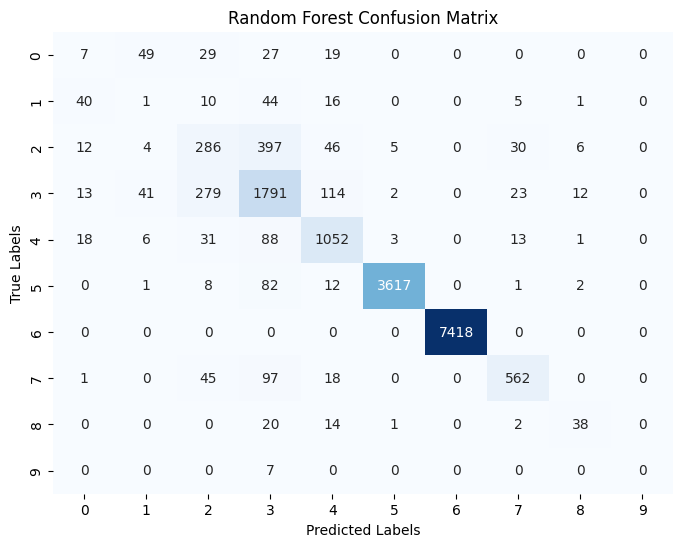

In [59]:
# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf_predictions, title='Random Forest Confusion Matrix')

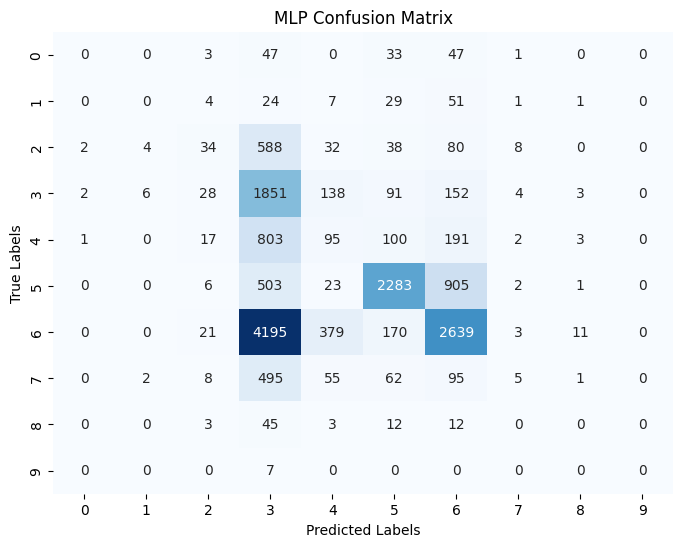

In [60]:
# Plot confusion matrix for MLP
plot_confusion_matrix(y_test, mlp_predictions, title='MLP Confusion Matrix')

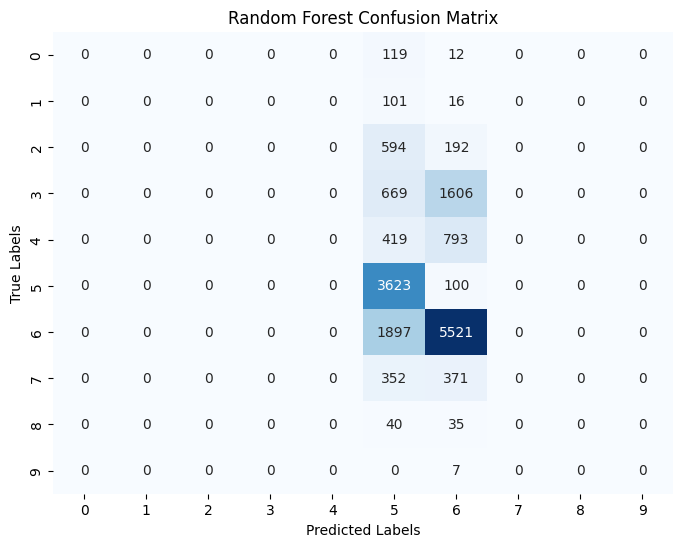

In [61]:
# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, y_pred_lr, title='Random Forest Confusion Matrix')

In [62]:
knn_cm = confusion_matrix(y_test, knn_model_pred)

dt_cm = confusion_matrix(y_test, dt_model_pred)

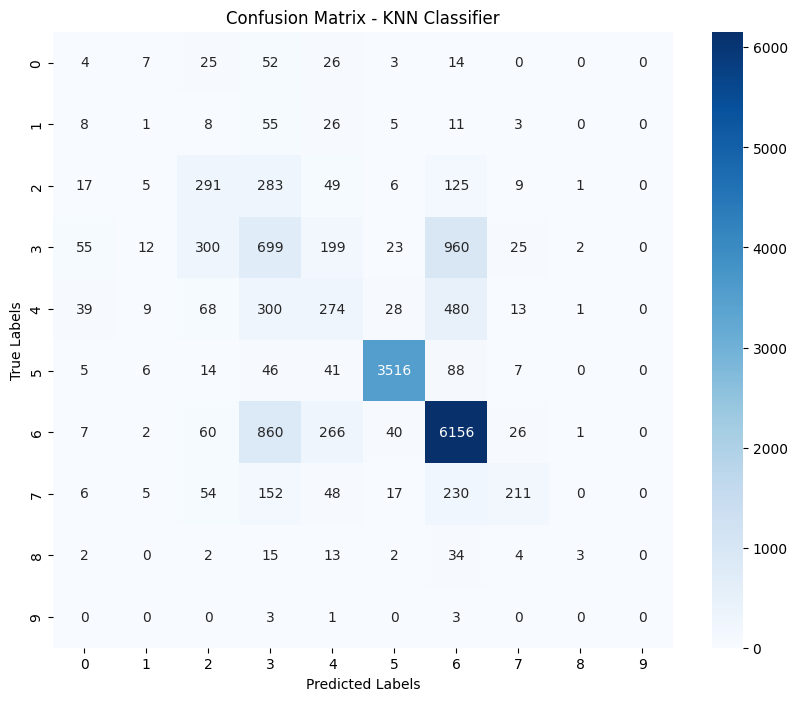

In [63]:
# Plotting confusion matrix for Random Forest Classifier
plt.figure(figsize=(10, 8))
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - KNN Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

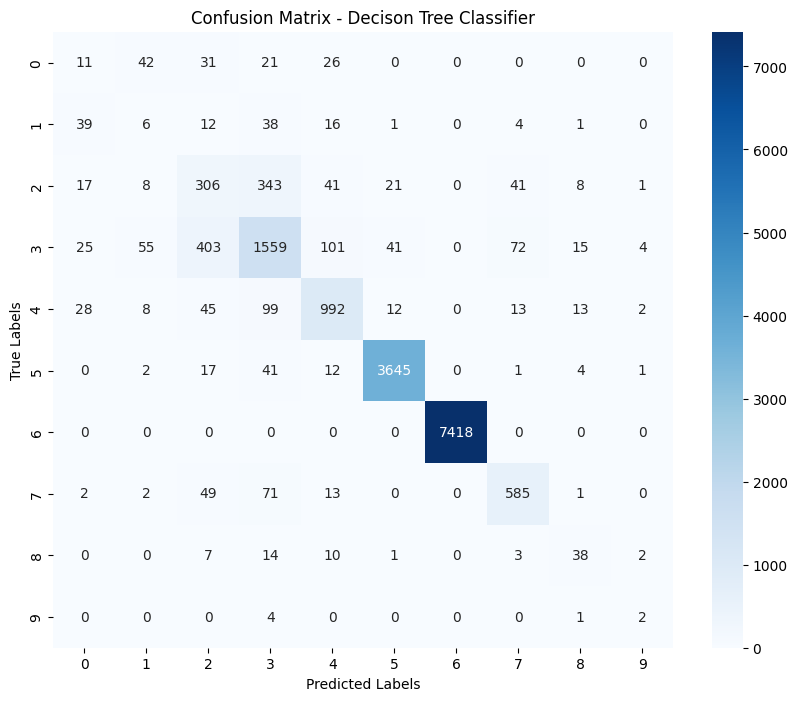

In [64]:
# Plotting confusion matrix for Random Forest Classifier
plt.figure(figsize=(10, 8))
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Decison Tree Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [65]:
from sklearn.metrics import f1_score

# Calculate F1 score for Random Forest
rf_f1_score = f1_score(y_test, rf_predictions, average=None)
print("Random Forest F1 Score:", (rf_f1_score))

# Calculate F1 score for MLP
mlp_f1_score = f1_score(y_test, mlp_predictions, average=None)
print("MLP F1 Score:", (mlp_f1_score))

# Calculate F1 score for Logistic regression
lr_f1_score = f1_score(y_test, y_pred_lr, average=None)
print("Logistic regression F1 Score:", (lr_f1_score))

Random Forest F1 Score: [0.06306306 0.00913242 0.3880597  0.74192212 0.84059129 0.9840838
 1.         0.82707873 0.56296296 0.        ]
MLP F1 Score: [0.         0.         0.07472527 0.34173359 0.09773663 0.6980584
 0.45539258 0.01335113 0.         0.        ]
Logistic regression F1 Score: [0.         0.         0.         0.         0.         0.62806622
 0.6870761  0.         0.         0.        ]


In [66]:
from sklearn.metrics import f1_score

# Calculate F1 score for Random Forest
rf_f1_score = f1_score(y_test, rf_predictions, average=None)
print("Random Forest F1 Score:", max(rf_f1_score))

# Calculate F1 score for MLP
mlp_f1_score = f1_score(y_test, mlp_predictions, average=None)
print("MLP F1 Score:", max(mlp_f1_score))

# Calculate F1 score for Logistic regression
lr_f1_score = f1_score(y_test, y_pred_lr, average=None)
print("Logistic regression F1 Score:", max(lr_f1_score))

Random Forest F1 Score: 1.0
MLP F1 Score: 0.6980584008561384
Logistic regression F1 Score: 0.687076099807106


In [67]:
# Plot F1 score for each class
def plot_f1_score(f1_scores, model_name):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(f1_scores)), f1_scores, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('F1 Score')
    plt.title(f'{model_name} F1 Score for Each Class')
    plt.xticks(range(len(f1_scores)))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

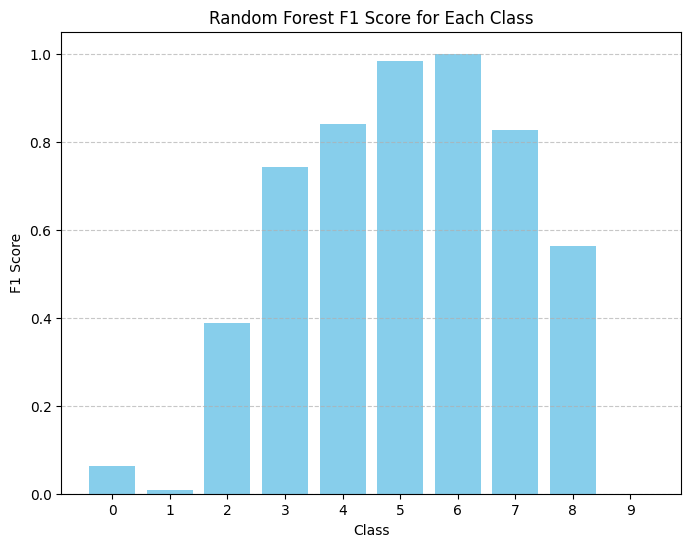

In [68]:
# Plot F1 score for Random Forest
plot_f1_score(rf_f1_score, 'Random Forest')



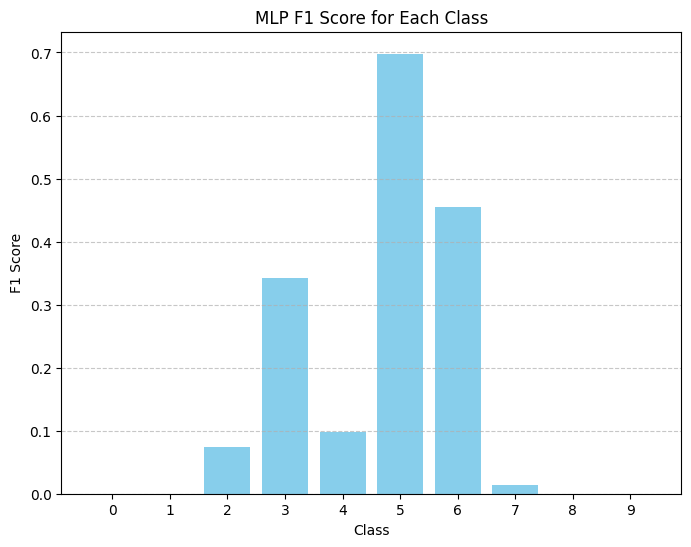

In [69]:
# Plot F1 score for MLP
plot_f1_score(mlp_f1_score, 'MLP')

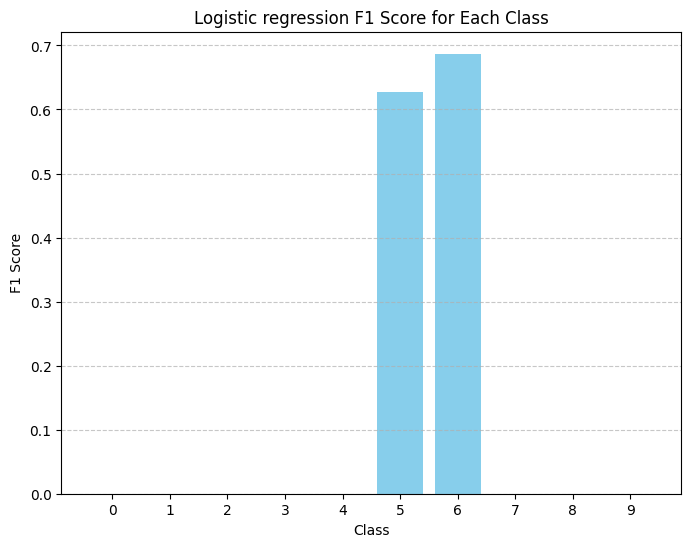

In [70]:
# Plot F1 score for Logistic regression
plot_f1_score(lr_f1_score, 'Logistic regression')

### Improve performance of the applied models

In [72]:
# from sklearn.model_selection import GridSearchCV

# # Example: Grid Search for Random Forest
# param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
# grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_imputed, y_train)


In [73]:
# # 1. Get the Best Parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # 2. Evaluate Performance
# best_rf_model = grid_search.best_estimator_
# best_rf_predictions = best_rf_model.predict(X_test_imputed)
# best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)
# print("Best Random Forest Accuracy:", best_rf_accuracy)


In [74]:
# # Calculate F1 score for Random Forest
# best_f1_score = f1_score(y_test, best_rf_predictions, average=None)
# print("Random Forest F1 Score:", (best_f1_score))

### *Performance improved a little bit.*

In [75]:
# from sklearn.model_selection import GridSearchCV

# # Grid Search for Logistic Regression
# param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
# logistic_regression = LogisticRegression()
# grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_imputed, y_train)


In [76]:
# # 1. Get the Best Parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # 2. Evaluate Performance
# best_logistic_regression = grid_search.best_estimator_
# best_logistic_regression_predictions = best_logistic_regression.predict(X_test_imputed)
# best_logistic_regression_accuracy = accuracy_score(y_test, best_logistic_regression_predictions)
# print("Best Logistic Regression Accuracy:", best_logistic_regression_accuracy)

In [77]:
# from sklearn.metrics import classification_report, confusion_matrix

# # Calculate classification report
# print("Classification Report:")
# print(classification_report(y_test, best_logistic_regression_predictions))

# # Calculate confusion matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, best_logistic_regression_predictions))


In [78]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc

# # Define a function to plot ROC curves for multiple models
# def plot_roc_curves(models, X_test, y_test):
#     plt.figure(figsize=(10, 6))
#     for name, model in models.items():
#         y_score = model.predict_proba(X_test_imputed)
#         n_classes = y_score.shape[1]
#         fpr = dict()
#         tpr = dict()
#         roc_auc = dict()
#         for i in range(n_classes):
#             fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
#             roc_auc[i] = auc(fpr[i], tpr[i])

#         # Compute micro-average ROC curve and ROC area
#         fpr["micro"], tpr["micro"], _ = roc_curve((y_test.ravel() == np.arange(n_classes)[:, None]).ravel(), y_score.ravel())
#         roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#         # Plot micro-average ROC curve
#         plt.plot(fpr["micro"], tpr["micro"], label='%s (AUC = %0.2f)' % (name, roc_auc["micro"]))

#     plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curves for Different Models')
#     plt.legend(loc="lower right")
#     plt.show()


# # Plot ROC curves for the first dataset
# plot_roc_curves({
#     'Random Forest': rf_model,
#     'MLP': mlp_model,
#     'Logistic Regression': logistic_regression
# }, X_test_imputed, y_test)

### Second Dataset -> CICIDS2017

In [79]:
df.head()

Destination Port   Flow Duration   Total Fwd Packets  \
0                 80           38308                   1   
1                389             479                  11   
2                 88            1095                  10   
3                389           15206                  17   
4                 88            1092                   9   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                            6   
1                        5                          172   
2                        6                         3150   
3                       12                         3452   
4                        6                         3150   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             6                       6   
1                           326                      79   
2                          3150                    1575   
3                          6660                    1313   
4                          3152                    1575   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       6                 6.000000                0.000000   
1                       0                15.636364               31.449238   
2                       0               315.000000              632.561635   
3                       0               203.058823              425.778474   
4                       0               350.000000              694.509719   

   ...   min_seg_size_forward  Active Mean   Active Std   Active Max  \
0  ...                     20          0.0          0.0            0   
1  ...                     32          0.0          0.0            0   
2  ...                     32          0.0          0.0            0   
3  ...                     32          0.0          0.0            0   
4  ...                     32          0.0          0.0            0   

    Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0            0        0.0        0.0          0          0  BENIGN  
1            0        0.0        0.0          0          0  BENIGN  
2            0        0.0        0.0          0          0  BENIGN  
3            0        0.0        0.0          0          0  BENIGN  
4            0        0.0        0.0          0          0  BENIGN  

[5 rows x 79 columns]

In [80]:
print(df.shape)


(692703, 79)


In [81]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             692703 non-null  int64  
 1    Flow Duration                692703 non-null  int64  
 2    Total Fwd Packets            692703 non-null  int64  
 3    Total Backward Packets       692703 non-null  int64  
 4   Total Length of Fwd Packets   692703 non-null  int64  
 5    Total Length of Bwd Packets  692703 non-null  int64  
 6    Fwd Packet Length Max        692703 non-null  int64  
 7    Fwd Packet Length Min        692703 non-null  int64  
 8    Fwd Packet Length Mean       692703 non-null  float64
 9    Fwd Packet Length Std        692703 non-null  float64
 10  Bwd Packet Length Max         692703 non-null  int64  
 11   Bwd Packet Length Min        692703 non-null  int64  
 12   Bwd Packet Length Mean       692703 non-nul

In [82]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [83]:
print(df.describe())


        Destination Port   Flow Duration   Total Fwd Packets  \
count      692703.000000    6.927030e+05       692703.000000   
mean         5686.869462    2.800168e+07            9.556261   
std         15727.423560    4.276680e+07          747.197814   
min             0.000000   -1.000000e+00            1.000000   
25%            53.000000    2.010000e+02            2.000000   
50%            80.000000    6.143700e+04            2.000000   
75%           443.000000    8.302437e+07            7.000000   
max         65487.000000    1.200000e+08       203943.000000   

        Total Backward Packets  Total Length of Fwd Packets  \
count            692703.000000                 6.927030e+05   
mean                 10.214079                 5.550930e+02   
std                 984.204633                 6.163663e+03   
min                   0.000000                 0.000000e+00   
25%                   1.000000                 1.200000e+01   
50%                   2.000000               

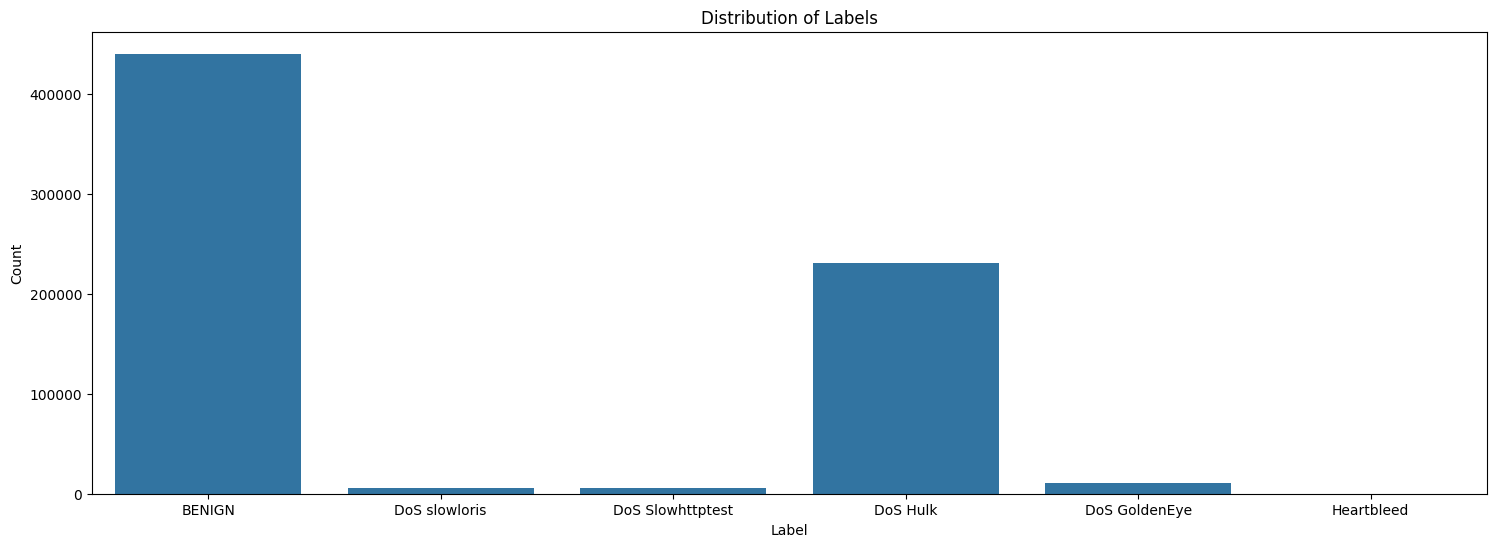

In [84]:
# Distribution of the target variable
plt.figure(figsize=(18, 6))
sns.countplot(x=' Label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


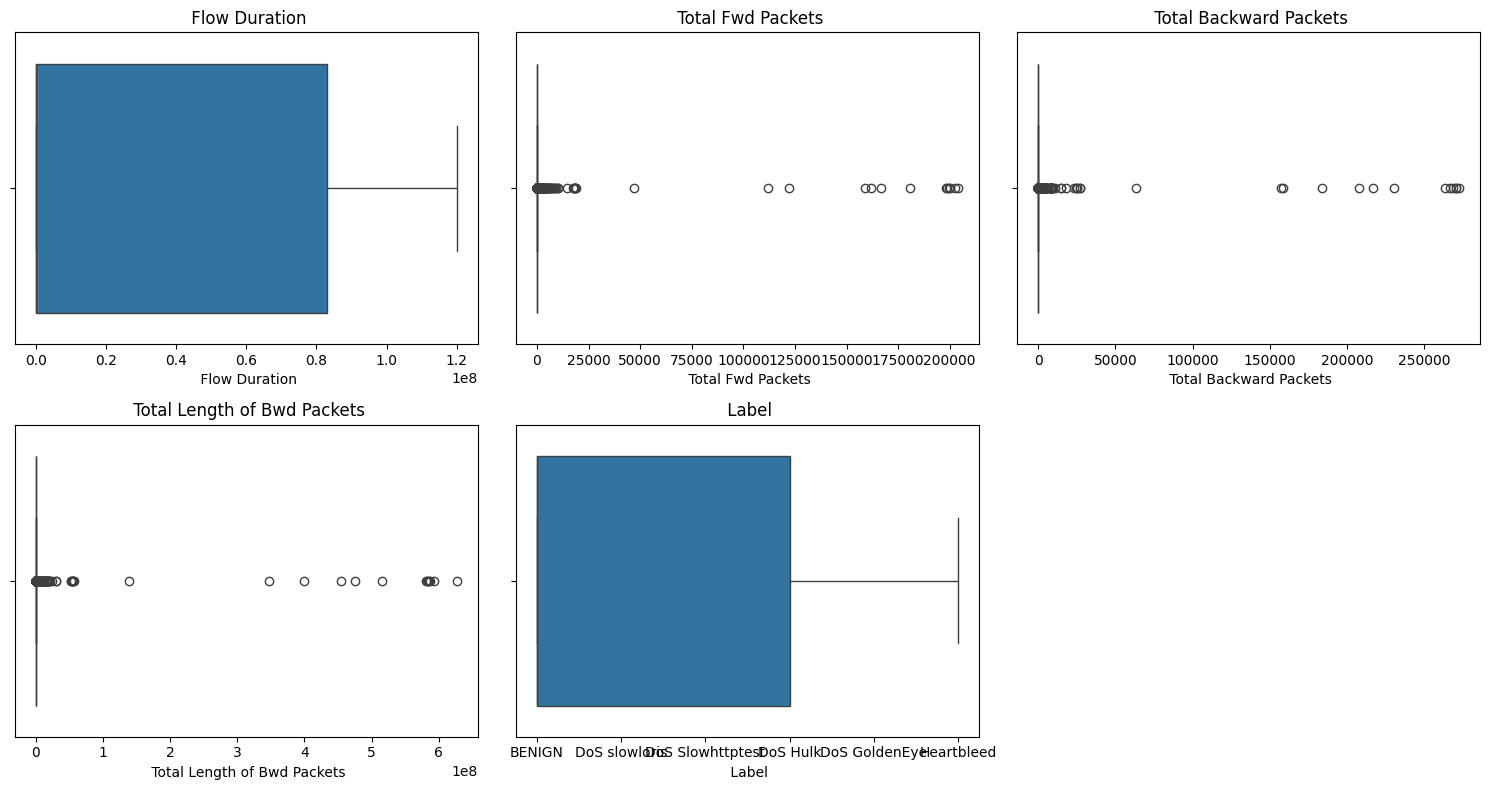

In [85]:
# Outlier detection for specific features
outlier_cols = [' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', ' Total Length of Bwd Packets', ' Label']
plt.figure(figsize=(15, 8))
for i, col in enumerate(outlier_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

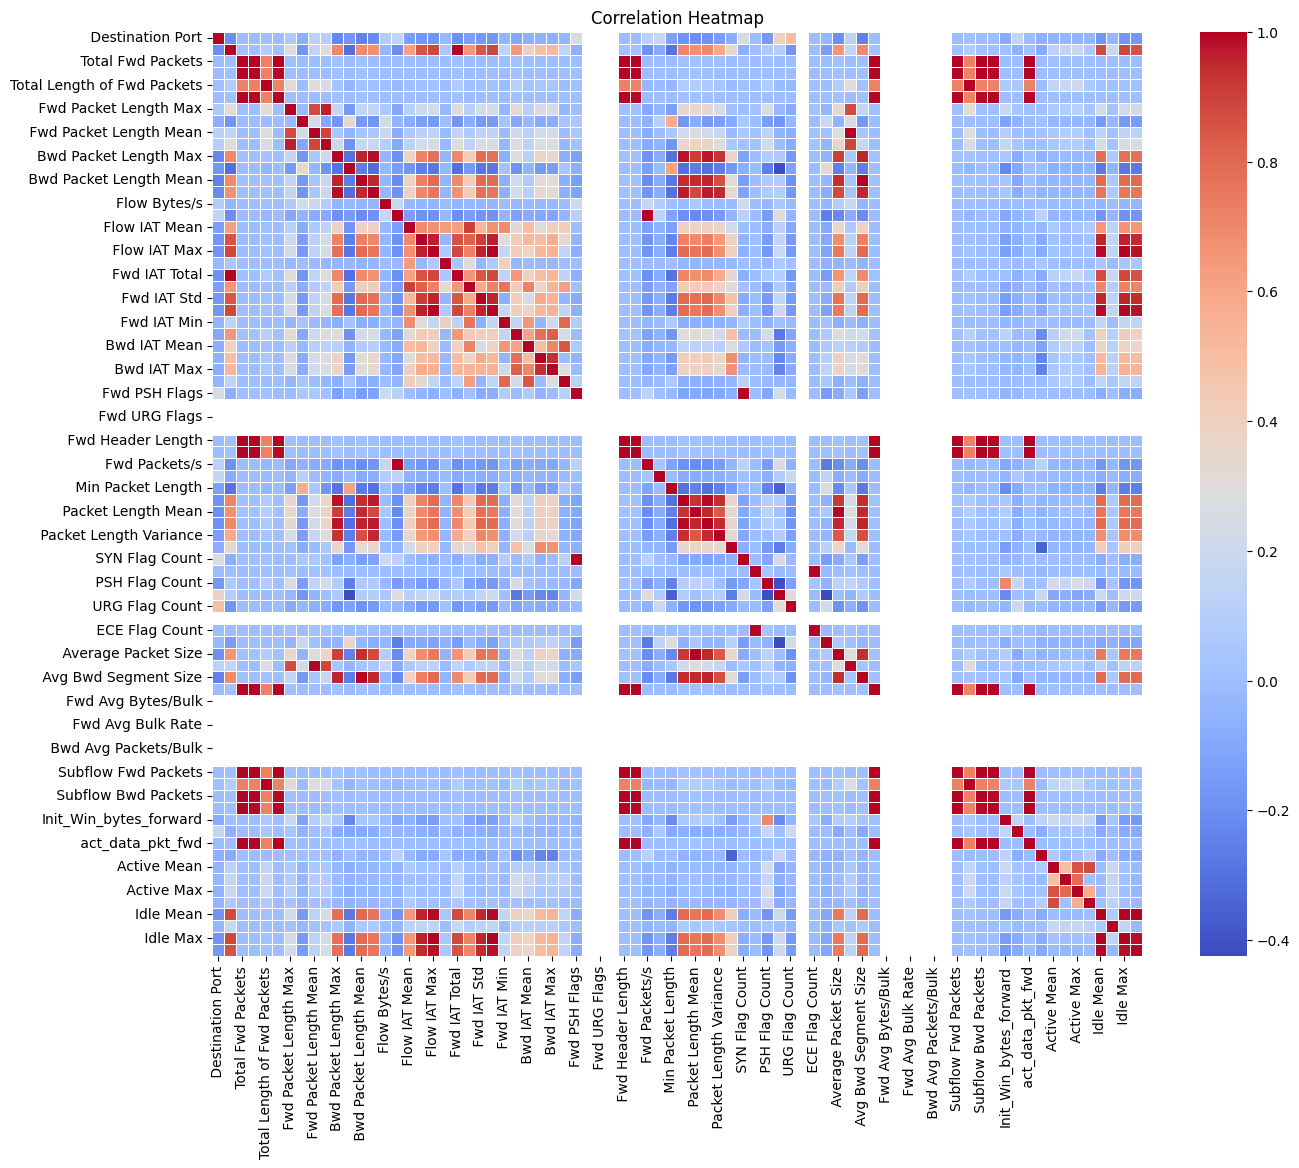

In [86]:
# Exclude non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [87]:
df.isnull().sum().sum()

1008

In [88]:
# Check which columns have null values
null_columns = df.columns[df.isnull().any()]
print("Columns with null values:")
print(null_columns)

# Impute null values with the mean for numerical columns
for col in null_columns:
    if df[col].dtype != 'object':  # Check if column is numeric
        df[col].fillna(df[col].mean(), inplace=True)

# Verify if null values have been handled
print("Remaining null values after imputation:")
print(df.isnull().sum().sum())


Columns with null values:
Index(['Flow Bytes/s'], dtype='object')
Remaining null values after imputation:
0


In [89]:
df[' Label'].value_counts()

 Label
BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: count, dtype: int64

In [90]:
# Define a dictionary to map categories to numerical labels
label_mapping = {
    'BENIGN': 0,
    'DoS Hulk': 1,
    'DoS GoldenEye': 2,
    'DoS slowloris': 3,
    'DoS Slowhttptest': 4,
    'Heartbleed': 5
}

# Map categories to numerical labels
df[' Label'] = df[' Label'].map(label_mapping)

# Display the first few rows of the DataFrame with numerical labels
print(df.head())


    Destination Port   Flow Duration   Total Fwd Packets  \
0                 80           38308                   1   
1                389             479                  11   
2                 88            1095                  10   
3                389           15206                  17   
4                 88            1092                   9   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                            6   
1                        5                          172   
2                        6                         3150   
3                       12                         3452   
4                        6                         3150   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             6                       6   
1                           326                      79   
2                          3150                    1575   
3                          6660                 

In [91]:
# Identify feature importance using correlation with the target variable
correlation_with_label = df.corr()[' Label'].abs().sort_values(ascending=False)
print("Correlation of features with Label:")
print(correlation_with_label)

# Drop less important features or those with low correlation
# For example, let's drop features with correlation less than 0.1
less_important_features = correlation_with_label[correlation_with_label < 0.1].index
df_selected = df.drop(columns=less_important_features)

# Display the selected features
print("Selected features:")
print(df_selected.columns)

Correlation of features with Label:
 Label                   1.000000
 Fwd IAT Max             0.488177
 Flow IAT Max            0.487865
 Idle Max                0.486355
 Flow IAT Std            0.475177
                           ...   
 Fwd Avg Packets/Bulk         NaN
 Fwd Avg Bulk Rate            NaN
 Bwd Avg Bytes/Bulk           NaN
 Bwd Avg Packets/Bulk         NaN
Bwd Avg Bulk Rate             NaN
Name:  Label, Length: 79, dtype: float64
Selected features:
Index([' Destination Port', ' Flow Duration', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean',
       ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', 'Fwd Packets/s',
       ' Min Packet Length', ' Max Packet Length',

In [92]:
df.shape

(692703, 79)

In [93]:
df_selected.isnull().sum().sum()

0

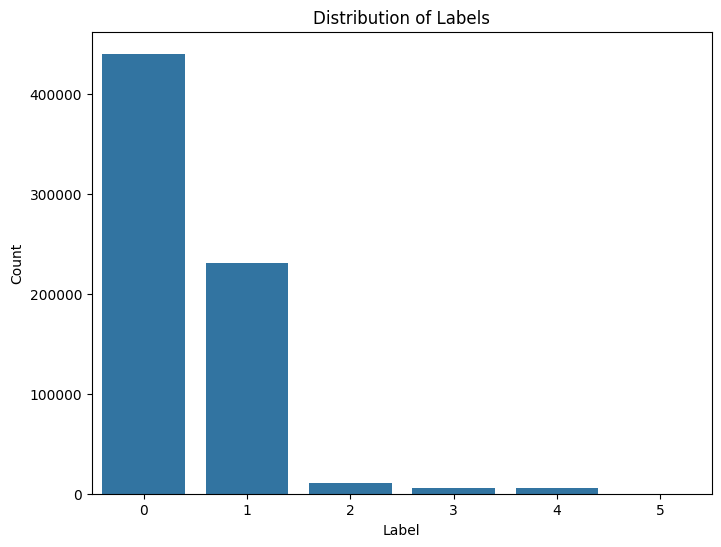

In [94]:
plt.figure(figsize=(8, 6))
sns.countplot(x=' Label', data=df_selected)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


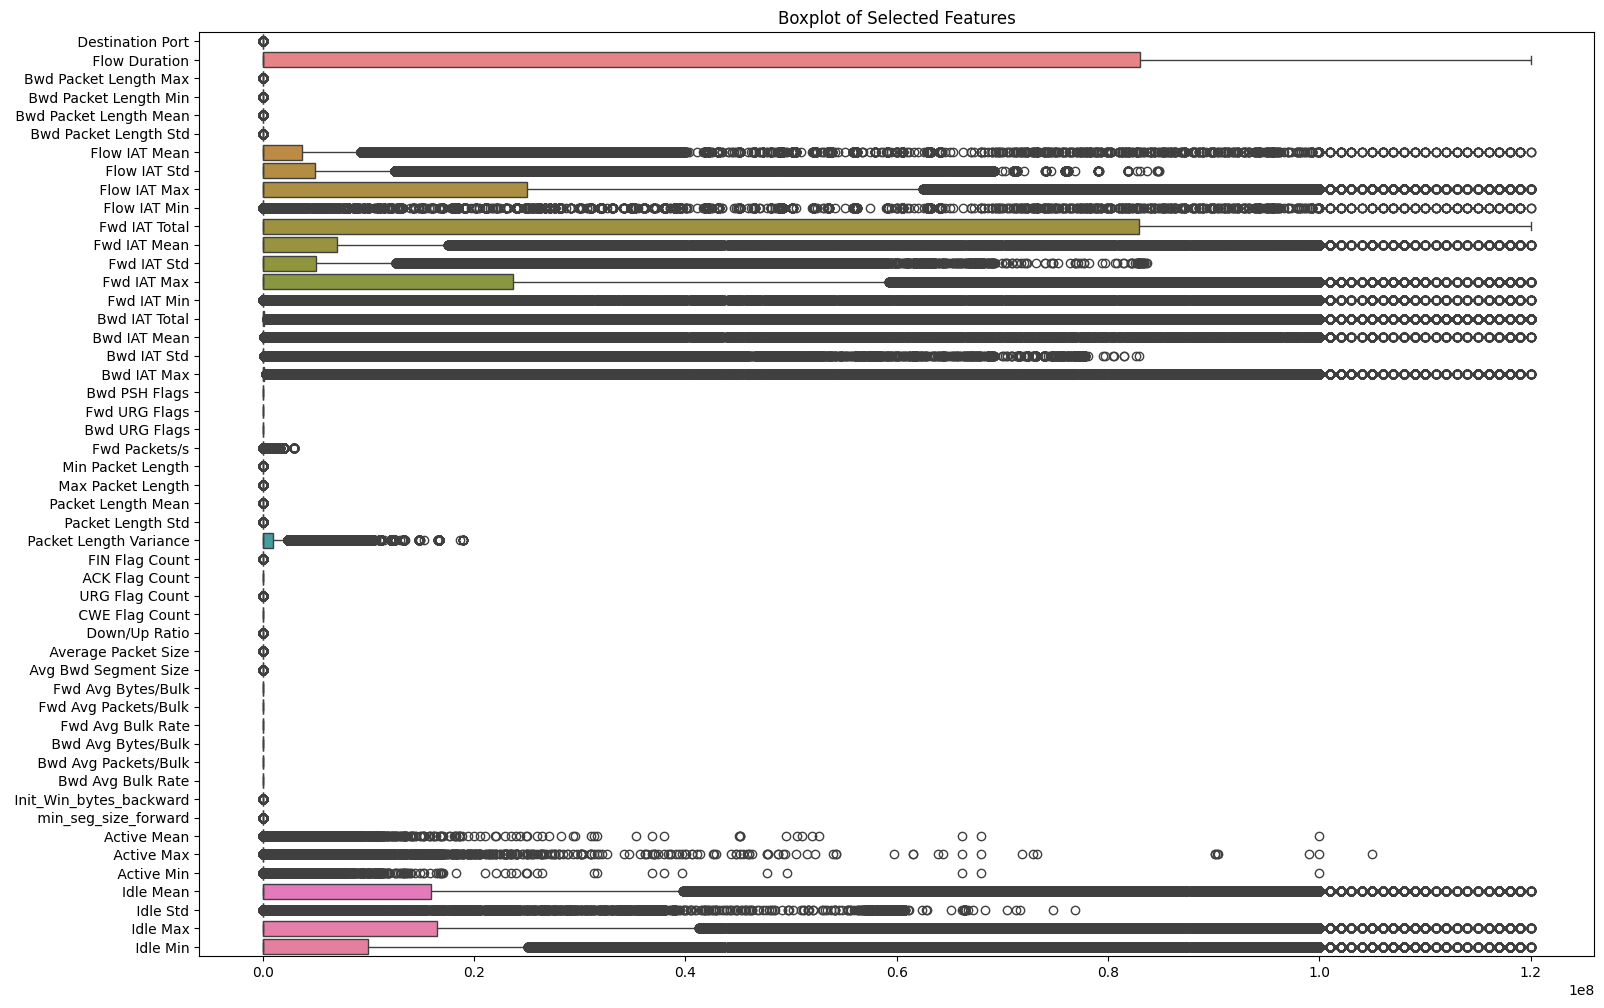

In [95]:
# Boxplot for individual features
plt.figure(figsize=(18, 12))
sns.boxplot(data=df_selected.drop(columns=' Label'), orient='h')
plt.title('Boxplot of Selected Features')
plt.show()


In [96]:
from sklearn.model_selection import train_test_split

# Splitting features and target variable
X = df_selected.drop(columns=' Label')
y = df_selected[' Label']

In [97]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
X_test.shape

(138541, 50)

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [100]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [101]:
from sklearn.neighbors import KNeighborsClassifier

# Train a K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [102]:
from sklearn.linear_model import LogisticRegression

# Create and fit Logistic Regression Classifier
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [103]:
from sklearn.neural_network import MLPClassifier

# Create and fit MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [104]:
from sklearn.metrics import accuracy_score

# Predictions
rf_predictions = rf_classifier.predict(X_test)
lr_predictions = lr_classifier.predict(X_test)
mlp_predictions = mlp_classifier.predict(X_test)

In [105]:
dt_model_pred = dt_model.predict(X_test)


In [106]:
knn_model_pred = knn_model.predict(X_test)


In [107]:
# Accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)

print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Logistic Regression Classifier Accuracy:", lr_accuracy)
print("MLP Classifier Accuracy:", mlp_accuracy)

Random Forest Classifier Accuracy: 0.9986574371485697
Logistic Regression Classifier Accuracy: 0.7934113367162068
MLP Classifier Accuracy: 0.6455778433821034


In [108]:
knn_accuracy = accuracy_score(y_test, knn_model_pred)


In [109]:
print("KNN  Classifier Accuracy:", knn_accuracy)

KNN  Classifier Accuracy: 0.994052302206567


In [ ]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, linestyle='-', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(mlp_fpr, mlp_tpr, linestyle='-', label=f'MLP (AUC = {mlp_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, linestyle='-', label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, linestyle='-', label=f'Extra Trees (AUC = {dt_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, linestyle='-', label=f'XGBoost (AUC = {knn_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Classifiers')
plt.legend()
plt.show()

In [110]:
from sklearn.metrics import f1_score

# F1 Score
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')
mlp_f1 = f1_score(y_test, mlp_predictions, average='weighted')

print("Random Forest Classifier F1 Score:", rf_f1)
print("Logistic Regression Classifier F1 Score:", lr_f1)
print("MLP Classifier F1 Score:", mlp_f1)


Random Forest Classifier F1 Score: 0.9986576004608533
Logistic Regression Classifier F1 Score: 0.7970394336858169
MLP Classifier F1 Score: 0.6365811032234288


In [111]:
from sklearn.metrics import f1_score

# F1 Score
knn_f1 = f1_score(y_test, knn_model_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_model_pred, average='weighted')

print("KNN Classifier F1 Score:", knn_f1)
print("Decision Classifier F1 Score:", dt_f1)


KNN Classifier F1 Score: 0.9940567513010079
Decision Classifier F1 Score: 0.9983256028220934


In [112]:
from sklearn.metrics import classification_report

# Classification report for Random Forest Classifier
rf_report = classification_report(y_test, rf_predictions)
print("Classification Report - Random Forest Classifier:")
print(rf_report)

# Classification report for Logistic Regression Classifier
lr_report = classification_report(y_test, lr_predictions)
print("\nClassification Report - Logistic Regression Classifier:")
print(lr_report)

# Classification report for MLP Classifier
mlp_report = classification_report(y_test, mlp_predictions)
print("\nClassification Report - MLP Classifier:")
print(mlp_report)


Classification Report - Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     88170
           1       1.00      1.00      1.00     46147
           2       1.00      1.00      1.00      2017
           3       0.99      1.00      0.99      1114
           4       1.00      0.99      0.99      1090
           5       1.00      1.00      1.00         3

    accuracy                           1.00    138541
   macro avg       1.00      1.00      1.00    138541
weighted avg       1.00      1.00      1.00    138541



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report - Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.91      0.75      0.83     88170
           1       0.67      0.88      0.76     46147
           2       0.63      0.79      0.70      2017
           3       0.34      0.32      0.33      1114
           4       0.78      0.73      0.75      1090
           5       0.00      0.00      0.00         3

    accuracy                           0.79    138541
   macro avg       0.55      0.58      0.56    138541
weighted avg       0.82      0.79      0.80    138541



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report - MLP Classifier:
              precision    recall  f1-score   support

           0       1.00      0.49      0.66     88170
           1       0.48      1.00      0.65     46147
           2       0.00      0.00      0.00      2017
           3       0.00      0.00      0.00      1114
           4       0.00      0.00      0.00      1090
           5       0.00      0.00      0.00         3

    accuracy                           0.65    138541
   macro avg       0.25      0.25      0.22    138541
weighted avg       0.80      0.65      0.64    138541



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
# Classification report for Logistic Regression Classifier
knn_report = classification_report(y_test, knn_model_pred)
print("\nClassification Report - knn Classifier:")
print(knn_report)


Classification Report - knn Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     88170
           1       0.99      1.00      0.99     46147
           2       0.99      0.99      0.99      2017
           3       0.96      0.97      0.97      1114
           4       0.97      0.99      0.98      1090
           5       1.00      1.00      1.00         3

    accuracy                           0.99    138541
   macro avg       0.98      0.99      0.99    138541
weighted avg       0.99      0.99      0.99    138541



In [114]:
# Classification report for Logistic Regression Classifier
dt_report = classification_report(y_test, dt_model_pred)
print("\nClassification Report - Decision Tree Classifier:")
print(dt_report)


Classification Report - Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     88170
           1       1.00      1.00      1.00     46147
           2       0.99      1.00      0.99      2017
           3       0.99      0.99      0.99      1114
           4       0.99      0.99      0.99      1090
           5       1.00      1.00      1.00         3

    accuracy                           1.00    138541
   macro avg       0.99      1.00      0.99    138541
weighted avg       1.00      1.00      1.00    138541



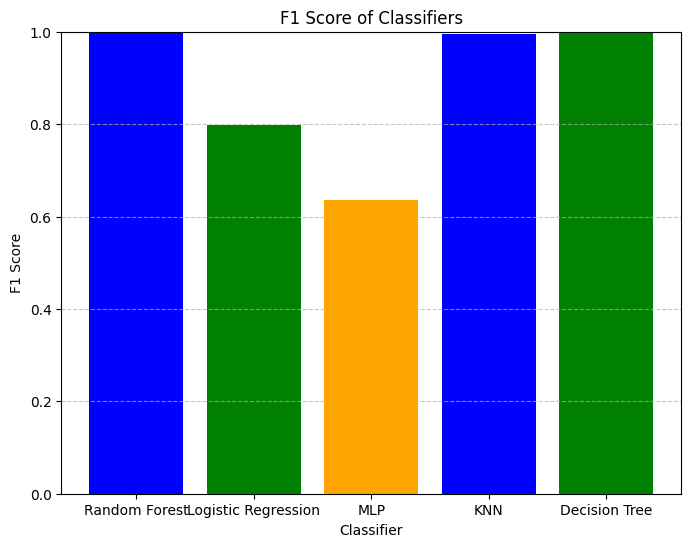

In [115]:
import matplotlib.pyplot as plt

# F1 scores
classifiers = ['Random Forest', 'Logistic Regression', 'MLP', 'KNN', 'Decision Tree']
f1_scores = [rf_f1, lr_f1, mlp_f1, knn_f1, dt_f1]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(classifiers, f1_scores, color=['blue', 'green', 'orange'])
plt.title('F1 Score of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


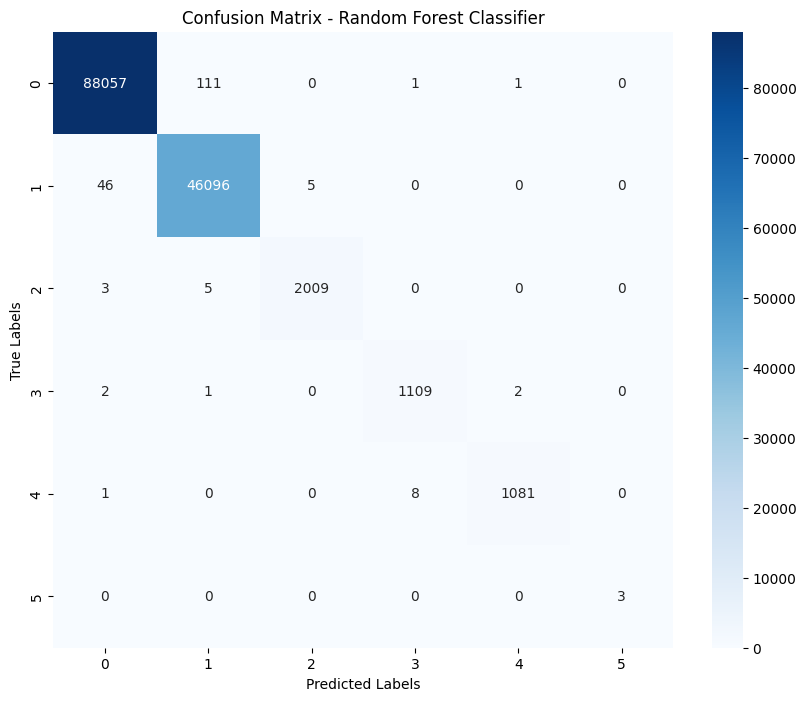

In [116]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for Random Forest Classifier
rf_cm = confusion_matrix(y_test, rf_predictions)

# Confusion matrix for Logistic Regression Classifier
lr_cm = confusion_matrix(y_test, lr_predictions)

# Confusion matrix for MLP Classifier
mlp_cm = confusion_matrix(y_test, mlp_predictions)

knn_cm = confusion_matrix(y_test, knn_model_pred)

dt_cm = confusion_matrix(y_test, dt_model_pred)


# Plotting confusion matrix for Random Forest Classifier
plt.figure(figsize=(10, 8))
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

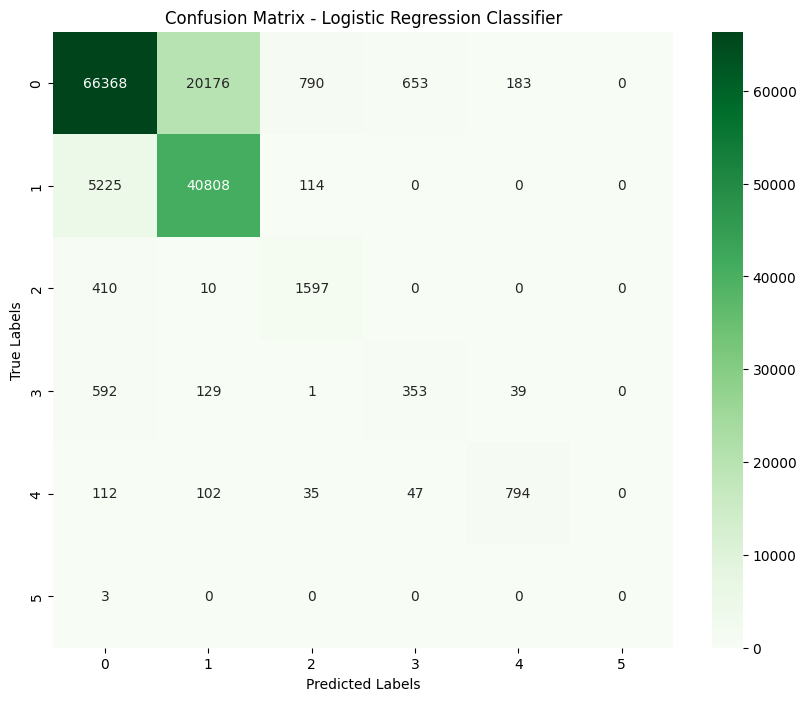

In [117]:
# Plotting confusion matrix for Logistic Regression Classifier
plt.figure(figsize=(10, 8))
sns.heatmap(lr_cm, annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix - Logistic Regression Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


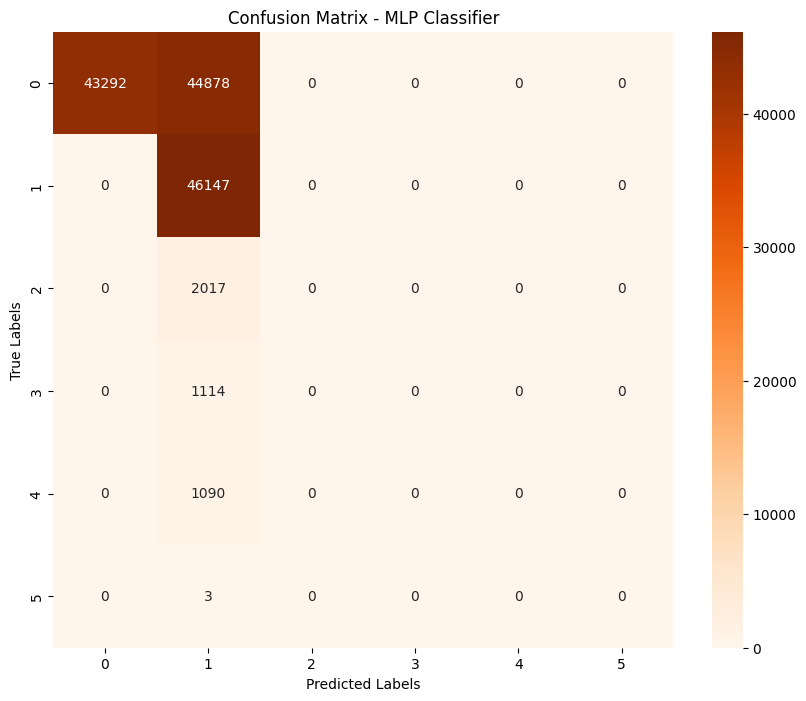

In [118]:
# Plotting confusion matrix for MLP Classifier
plt.figure(figsize=(10, 8))
sns.heatmap(mlp_cm, annot=True, cmap='Oranges', fmt='g')
plt.title('Confusion Matrix - MLP Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

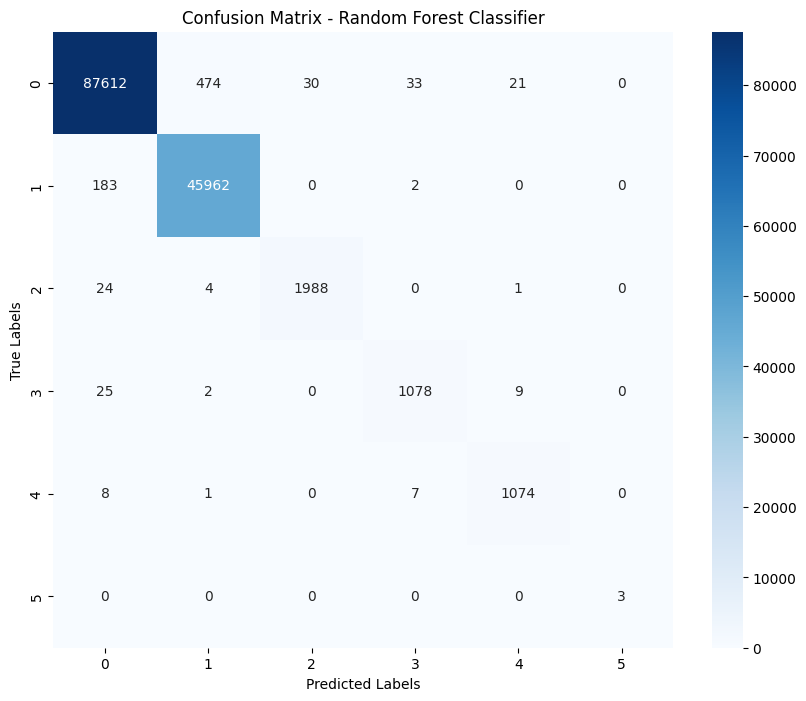

In [119]:
# Plotting confusion matrix for Random Forest Classifier
plt.figure(figsize=(10, 8))
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

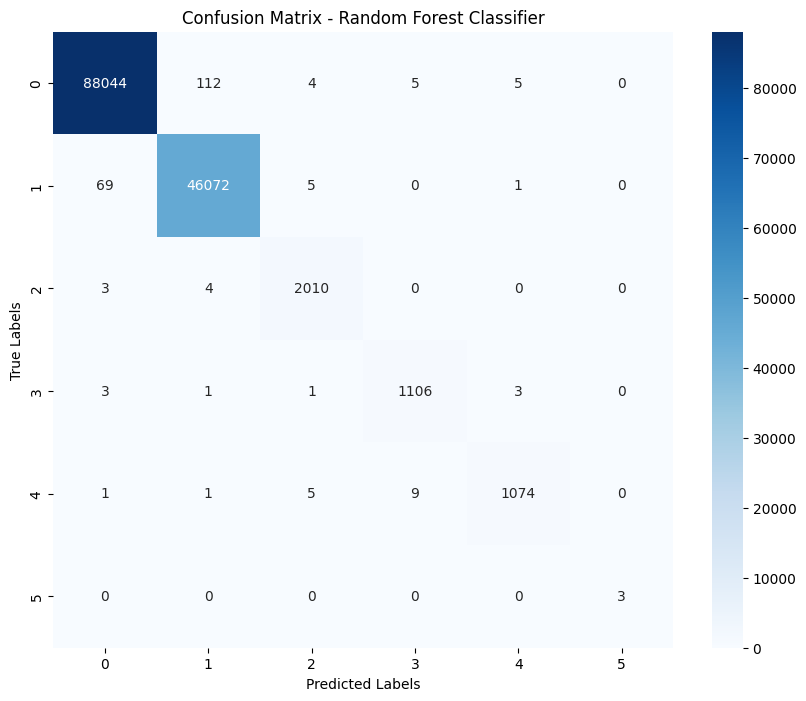

In [120]:
# Plotting confusion matrix for Random Forest Classifier
plt.figure(figsize=(10, 8))
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Code for XGBOOST model

In [ ]:
import xgboost as xgb


In [ ]:
model = xgb.XGBClassifier()

In [129]:
from sklearn.metrics import roc_curve, roc_auc_score

#Calculate predicted probabilities for each model
rf_probs = rf_classifier.predict_proba(X_test)
mlp_probs = mlp_classifier.predict_proba(X_test)
lr_probs = lr_classifier.predict_proba(X_test)


In [131]:
et_probs = knn_model.predict_proba(X_test)


In [128]:
xgb_probs = dt_model.predict_proba(X_test)

In [151]:
print("Shape of rf_probs:", rf_probs.shape)
print("Shape of mlp_probs:", mlp_probs.shape)
print("Shape of lr_probs:", lr_probs.shape)
print("Shape of et_probs:", et_probs.shape)
print("Shape of xgb_probs:", xgb_probs.shape)

Shape of rf_probs: (138541,)
Shape of mlp_probs: (138541,)
Shape of lr_probs: (138541,)
Shape of et_probs: (138541,)
Shape of xgb_probs: (138541,)


In [152]:
# Extract probabilities for the positive outcome only
rf_probs = rf_probs if len(rf_probs.shape) == 1 else rf_probs[:, 1]
mlp_probs = mlp_probs if len(mlp_probs.shape) == 1 else mlp_probs[:, 1]
lr_probs = lr_probs if len(lr_probs.shape) == 1 else lr_probs[:, 1]
et_probs = et_probs if len(et_probs.shape) == 1 else et_probs[:, 1]
xgb_probs = xgb_probs if len(xgb_probs.shape) == 1 else xgb_probs[:, 1]


In [137]:

# # Extract probabilities for the positive outcome only
# rf_probs = rf_probs[:, 1]
# lp_probs = mlp_probs[:, 1]
# lr_probs = lr_probs[:, 1]
# et_probs = et_probs[:, 1]
# xgb_probs = xgb_probs[:, 1]

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# Calculate ROC curve and ROC AUC for each model
rf_fpr, rf_tpr, _ = roc_curve(y_test_binarized[:, 0], rf_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test_binarized[:, 0], mlp_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_binarized[:, 0], lr_probs)
et_fpr, et_tpr, _ = roc_curve(y_test_binarized[:, 0], et_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test_binarized[:, 0], xgb_probs)

In [145]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# Ensure predicted probabilities are 2D arrays
rf_probs_reshaped = rf_probs.reshape(-1, 1) if rf_probs.ndim == 1 else rf_probs
mlp_probs_reshaped = mlp_probs.reshape(-1, 1) if mlp_probs.ndim == 1 else mlp_probs
lr_probs_reshaped = lr_probs.reshape(-1, 1) if lr_probs.ndim == 1 else lr_probs
et_probs_reshaped = et_probs.reshape(-1, 1) if et_probs.ndim == 1 else et_probs
xgb_probs_reshaped = xgb_probs.reshape(-1, 1) if xgb_probs.ndim == 1 else xgb_probs

# Calculate ROC AUC score for each model
rf_auc = roc_auc_score(y_test_binarized, rf_probs_reshaped, average='macro')
mlp_auc = roc_auc_score(y_test_binarized, mlp_probs_reshaped, average='macro')
lr_auc = roc_auc_score(y_test_binarized, lr_probs_reshaped, average='macro')
et_auc = roc_auc_score(y_test_binarized, et_probs_reshaped, average='macro')
xgb_auc = roc_auc_score(y_test_binarized, xgb_probs_reshaped, average='macro')

# Now you have the ROC AUC scores for each model


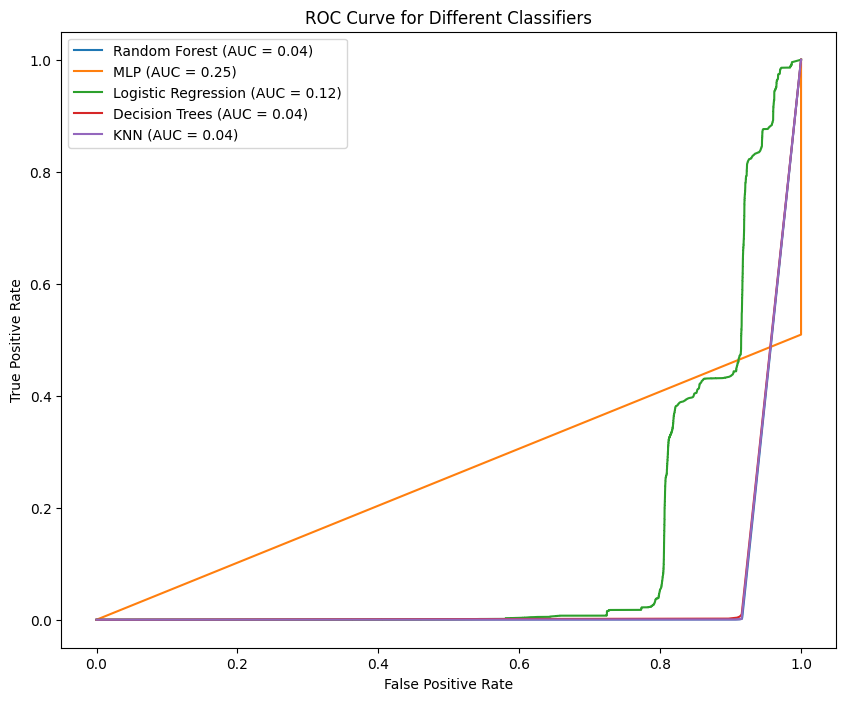

In [148]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, linestyle='-', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(mlp_fpr, mlp_tpr, linestyle='-', label=f'MLP (AUC = {mlp_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, linestyle='-', label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(et_fpr, et_tpr, linestyle='-', label=f'Decision Trees (AUC = {et_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label=f'KNN (AUC = {xgb_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Classifiers')
plt.legend()
plt.show()